# Venn diagramm

In [ ]:
install.packages('VennDiagram')
library(VennDiagram)

In [ ]:
plot_Venn_diagramm <- function(a, b, name_a, name_b) {
    options(repr.plot.res = 100) # set a high-definition resolution for the jupyter notebooks plots (DPI)
    notebook_plot_size(2, 2)
    
    return (draw.pairwise.venn(
    length(a),
    length(b),
    sum(a %in% b),
    category = c(name_a, name_b),
    fill = c("blue", "red"),
    alpha = c(0.5, 0.5),
    cat.pos = c(0, 0),
    scaled = TRUE))
}

plot_Venn_diagramm(oncokb_genes, candl_genes, "oncokb", "candl")

In [ ]:
notebook_plot_size(6, 6)
draw.triple.venn(
length(oncokb_genes),
length(cgi_genes),
length(civic_genes),
sum(oncokb_genes %in% cgi_genes),
sum(cgi_genes %in% civic_genes),
sum(civic_genes %in% oncokb_genes),
sum(cgi_genes %in% oncokb_genes & cgi_genes %in% civic_genes),
category = c("oncokb", "cgi", "civic"),
lty = rep("blank", 3),
fill = c("light blue", "pink", "green"),
alpha = rep(0.5, 3),
cat.pos = rep(0, 3),
cat.dist = rep(0.025, 3),
scaled = TRUE)

# ggballoonplot

In [ ]:
install.packages("ggpubr")
library(ggpubr)
theme_set(theme_pubr())

impact <- read.table("../../../data/cleaned_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)

ggballoonplot(as.data.frame(table(impact$Hugo_Symbol,
                                  impact$Variant_Type)),
              fill = "value") + scale_fill_viridis_c(option = "C")

In [ ]:
# install.packages("ggpubr")
# library(ggpubr)
# theme_set(theme_pubr())

colnames = c("is_in_oncokb", "is_in_civic", "is_in_cgi", "is_in_candl")

r <- data.frame()

for (col in colnames) {
    r <- rbind(r, impact %>% filter(!! sym(col) == "yes") %>%
                summarise(colnames = substr(col, 7, nchar(col)),
                          oncokb = sum(is_in_oncokb == "yes"),
                          civic  = sum(is_in_civic == "yes"),
                          cgi    = sum(is_in_cgi == "yes"),
                          candl  = sum(is_in_candl == "yes")))
}
r
ggballoonplot(r[,c("oncokb", "civic", "cgi", "candl")], fill = "value") + scale_fill_viridis_c(option = "C")

In [22]:
source("../src/utils/custom_tools.R")
setup_environment("../src/utils")

In [3]:
impact <- read.table("../data/cleaned_IMPACT_mutations_180508.txt", sep = "\t", stringsAsFactors = FALSE, header = TRUE)
#impact <- add_features("../data/", impact, annotations = TRUE)

# mutation distances checker

In [ ]:
check_distance <- function(starts, ends, mut_key, result) {
    if (length(starts) <= 1)
        return (result)
    
    for (i in 2:length(starts)) {
        if (starts[[i]] <= starts[[1]] & ends[[i]] >= starts[[1]] | starts[[i]] >= starts[[1]] & starts[[i]] <= ends[[1]]) {
            r1 <- data.frame(paste(starts[[1]], ends[[1]], sep = '_'), mut_key[[1]])
            r2 <- data.frame(paste(starts[[i]], ends[[i]], sep = '_'), mut_key[[i]])
            colnames(r1) <- c("v1", "v2")
            colnames(r2) <- c("v1", "v2")
            
            
            result <- rbind(result, r1)
            result <- rbind(result, r2)
            
            starts <- starts[-1]
            starts <- starts[-i]
            
            ends <- ends[-1]
            ends <- ends[-i]
            
            mut_key <- mut_key[-1]
            mut_key <- mut_key[-i]
            
            break
        }
    }
    
    if (length(starts) <= 1)
        return (result)
    
    return (check_distance(starts[2:length(starts)], ends[2:length(starts)], mut_key[2:length(starts)], result))
}

get_pos <- function(result) {
    if (nrow(result) == 0)
        return ("")
    else
        return (toString(result$v1))
}

get_mut <- function(result) {
    if (nrow(result) == 0)
        return ("")
    else
        return (toString(result$v2))
}




dd2 <- dd %>% group_by(Tumor_Sample_Barcode, Hugo_Symbol) %>% summarise(count = n(),
                                                                       pos = get_pos(check_distance(Start_Position, End_Position, mut_key, data.frame())),
                                                                       mut_key = get_mut(check_distance(Start_Position, End_Position, mut_key, data.frame()))) %>%
                                                             filter(pos != "")
nrow(dd2)
head(dd2, 10)

# Test cbioportal

In [32]:
utf8::utf8_print('\U0001f6a7 work in progress \U0001f6a7')

[1] "🚧​ work in progress 🚧​"


```shell
$ curl "http://www.cbioportal.org/webservice.do?cmd=getClinicalData&case_set_id=msk_impact_2017_all" --output cbioportal.txt```

In [21]:
cbioportal <- read.table("../../../data/other_databases/cbioportal.txt",
                         sep = "\t", stringsAsFactors = FALSE, header = TRUE, fill = TRUE)

In [22]:
head(cbioportal)

CASE_ID           CANCER_TYPE               
1 P-0005947-T01-IM5 Bladder Cancer            
2 P-0009180-T01-IM5 Melanoma                  
3 P-0008840-T01-IM5 Non-Small Cell Lung Cancer
4 P-0009304-T01-IM5 Glioma                    
5 P-0002010-T02-IM5 Ovarian Cancer            
6 P-0004434-T01-IM5 Breast Cancer             
  CANCER_TYPE_DETAILED              DNA_INPUT MATCHED_STATUS
1 Upper Tract Urothelial Carcinoma  250       Matched       
2 Cutaneous Melanoma                250       Matched       
3 Lung Adenocarcinoma               250       Matched       
4 Glioblastoma Multiforme           250       Matched       
5 Clear Cell Ovarian Cancer         250       Matched       
6 Breast Invasive Lobular Carcinoma 250       Matched       
  METASTATIC_SITE      ONCOTREE_CODE OS_MONTHS OS_STATUS PRIMARY_SITE
1                      UTUC          19.00     LIVING    Upper Tract 
2 Lymph Node, Regional SKCM             NA     DECEASED  Skin        
3 Lymph Node           LUAD           1.78     LIVING    Lung        
4                      GBM            1.22     LIVING    Brain       
5 Liver                CCOV           6.28     DECEASED  Ovary       
6 Ipsilateral Breast   ILC           17.85     LIVING    Breast      
  SAMPLE_CLASS SAMPLE_COLLECTION_SOURCE SAMPLE_COVERAGE SAMPLE_TYPE SEX   
1 Tumor        In-House                  648            Primary     Female
2 Tumor        In-House                  750            Metastasis  Female
3 Tumor        In-House                  978            Metastasis  Female
4 Tumor        Outside                  1124            Primary     Female
5 Tumor        In-House                  862            Metastasis  Female
6 Tumor        Outside                   718            Metastasis  Female
  SMOKING_HISTORY  SPECIMEN_PRESERVATION_TYPE SPECIMEN_TYPE TUMOR_PURITY
1 Unknown          DNA                        Resection     80          
2 Never            FFPE                       Resection     10          
3 Prev/Curr Smoker FFPE                       Resection     30          
4 Unknown          FFPE                       Biopsy        50          
5 Never            FFPE                       Resection     70          
6 Prev/Curr Smoker DNA                        Biopsy        50          
  VITAL_STATUS
1 ALIVE       
2 DECEASED    
3 ALIVE       
4 ALIVE       
5 DECEASED    
6 ALIVE

In [35]:
get_table(unique(impact$Tumor_Sample_Barcode) %in% keys$Tumor_Sample_Barcode)
get_table(unique(impact$Tumor_Sample_Barcode) %in% cbioportal$CASE_ID)

unmatched_keys <- impact[! impact$Tumor_Sample_Barcode %in% keys$Tumor_Sample_Barcode,]
unmatched_cbio <- impact[! impact$Tumor_Sample_Barcode %in% cbioportal$CASE_ID,]

get_table(unique(unmatched_keys$Tumor_Sample_Barcode) %in% cbioportal$CASE_ID)

values      count freq 
1 TRUE        20040 87.2%
2 FALSE        2950 12.8%
3 -- total -- 22990 100%

values      count freq 
1 FALSE       16283 70.8%
2 TRUE         6707 29.2%
3 -- total -- 22990 100%

values      count freq
1 FALSE       2064  70% 
2 TRUE         886  30% 
3 -- total -- 2950  100%

# Rename `Hugo_Symbol` in the final dataset

### [Modify] wrong or synonymous `Hugo_Symbol`

Unfortunately there are some wrong/synonymous `Hugo_Symbol`. We use the [symbol checker tool](https://www.genenames.org/cgi-bin/symbol_checker) of the website HGNC (HUGO Gene Nomenclature Committee) to correct the errors, we give the result of `unique(impact$Hugo_Symbol)` to the symbol checker tool, and check which symbols are wrong/synonymous. Any incertitude was double ckecked with [OncoKB](http://oncokb.org/#/). Based on the results, the following 18 symbols were found to be unofficial:

| Old Hugo Symbol  | New Hugo symbol | HGNC reason     |
| ---------------- | --------------- | --------------- |
| MLL3             | KMT2C           | Previous symbol |
| PAK7             | PAK5            | Previous symbol |
| RFWD2            | COP1            | Previous symbol |
| MYCL1            | MYCL            | Previous symbol |
| MLL2             | KMT2D           | Previous symbol |
| MLL              | KMT2A           | Previous symbol |
| FAM46C           | TENT5C          | Previous symbol |
| MRE11A           | MRE11           | Previous symbol |
| PARK2            | PRKN            | Previous symbol |
| FAM175A          | ABRAXAS1        | Previous symbol |
| TCEB1            | ELOC            | Previous symbol |
| WHSC1            | NSD2            | Previous symbol |
| WHSC1L1          | NSD3            | Previous symbol |
| FAM58A           | CCNQ            | Previous symbol |
| SETD8            | KMT5A           | Previous symbol |
| MLL4             | KMT2B           | Synonyms        |
| CDKN2Ap16INK4A   | CDKN2A          | Unmatched       |
| CDKN2Ap14ARF     | CDKN2Ap14ARF    | Unmatched       |
*The symbols `TCF3`, `TRAF2`and `ERF` are marked as "Previous symbol" and "Approved symbol" by HGNC, and are still considered official by OncoKB, so we kept them.

We decided to rename every symbols that are classified as "Previous Symbol" and "Synonyms" (see next header). The processus applied to rename `CDKN2Ap16INK4A` and `CDKN2Ap14ARF` is detailed just after (see second header).

#### Renaming the "Previous Symbol" and "Synonyms"

In [48]:
old_Hugo_Symbol = c('MLL3', 'PAK7', 'RFWD2', 'MYCL1', 'MLL2', 'MLL', 'FAM46C', 'MRE11A', 'PARK2', 'FAM175A',
                    'TCEB1', 'WHSC1', 'WHSC1L1', 'FAM58A', 'SETD8', 'MLL4')
new_Hugo_Symbol = c('KMT2C', 'PAK5', 'COP1', 'MYCL', 'KMT2D', 'KMT2A', 'TENT5C', 'MRE11', 'PRKN', 'ABRAXAS1',
                    'ELOC', 'NSD2', 'NSD3', 'CCNQ', 'KMT5A', 'KMT2B')

has_old_symbol <- which(impact$Hugo_Symbol %in% old_Hugo_Symbol)
length(impact$Hugo_Symbol[has_old_symbol]) # 5696 previous/synonyms symbols!

[1] 5696

In [49]:
dd <- head(unique(impact$Hugo_Symbol[has_old_symbol]), 10)
dd <- data.frame(dd, new_Hugo_Symbol[match(dd, old_Hugo_Symbol)], row.names = NULL)
colnames(dd) <- c("old", "new")
dd

old     new     
1  MLL3    KMT2C   
2  MYCL1   MYCL    
3  MLL2    KMT2D   
4  PAK7    PAK5    
5  MLL     KMT2A   
6  FAM46C  TENT5C  
7  MRE11A  MRE11   
8  PARK2   PRKN    
9  FAM175A ABRAXAS1
10 RFWD2   COP1

In [50]:
# [~5696 rows] modify wrong/synonymous Hugo_Symbol
impact$Hugo_Symbol[has_old_symbol] <- new_Hugo_Symbol[match(impact$Hugo_Symbol[has_old_symbol], old_Hugo_Symbol)]

#### Renaming`CDKN2Ap16INK4A` and `CDKN2Ap14ARF`

The symbole checker tool detected two symbols as "Unmatched", `CDKN2Ap16INK4A` and `CDKN2Ap14ARF`. These two symbols correspond to two different reading frame of the gene `CDKN2A`:
* `CDKN2Ap16INK4A` is the "classic" reading frame for `CDKN2A`, the one used by OncoKB (see [OncoKB CDKN2A](http://oncokb.org/#/gene/CDKN2A))  
   → RefSeq. NM_000077.4  
   → [Homo sapiens cyclin dependent kinase inhibitor 2A (CDKN2A), transcript variant 1, mRNA](https://www.ncbi.nlm.nih.gov/nuccore/NM_000077.4)  
   → [Wikipedia article p16](https://en.wikipedia.org/wiki/P16)
* `CDKN2Ap14ARF` is an Alternative Reading Frame (ARF, as said in its name) for `CDKN2A`, not used by OncoKB  
  → RefSeq. NM_058195.3  
  → [Homo sapiens cyclin dependent kinase inhibitor 2A (CDKN2A), transcript variant 4, mRNA](https://www.ncbi.nlm.nih.gov/nuccore/NM_058195)  
  → [Wikipedia article p14arf](https://en.wikipedia.org/wiki/P14arf)
  
We decided to replace every `CDKN2Ap16INK4A` by `CDKN2A`. We also decided to keep the name `CDKN2Ap14ARF` for the alternative reading frame, except when the mutation was already included, for this tumor sample, in the classic reading frame (in `CDKN2Ap16INK4A`), then we delete the mutation because it has already been read.

In [51]:
nrow(impact[impact$Hugo_Symbol == "CDKN2Ap16INK4A",])

[1] 1270

In [52]:
# [~1270 rows] Hugo_Symbol = CDKN2Ap16INK4A -> CDKN2A
impact$Hugo_Symbol[impact$Hugo_Symbol == "CDKN2Ap16INK4A"] <- "CDKN2A"

In [53]:
nrow(impact[impact$Hugo_Symbol == "CDKN2Ap14ARF",]) # mutations having the alternative reading data frame
dd <- impact %>% group_by(Tumor_Sample_Barcode) %>% summarise(has_both_reading_frame = sum(Hugo_Symbol == "CDKN2Ap14ARF") > 0 & sum(Hugo_Symbol == "CDKN2A") > 0) %>% filter(has_both_reading_frame)
nrow(impact[impact$Hugo_Symbol == "CDKN2Ap14ARF" & impact$Tumor_Sample_Barcode %in% dd$Tumor_Sample_Barcode,]) # mutations having the alternative reading data frame and the classic reading data frame for this tumor sample

[1] 758

[1] 713

We delete from `impact` the rows that are `CDKN2Ap14ARF` and have already been read in the classic reading frame:

In [54]:
# [-713 rows] Hugo_Symbol = CDKN2Ap14ARF and CDKN2A in the tumor sample
impact <- impact[! (impact$Hugo_Symbol == "CDKN2Ap14ARF" & impact$Tumor_Sample_Barcode %in% dd$Tumor_Sample_Barcode),]

# Old cross_validate and other ml stuffs

In [ ]:
from sklearn.model_selection import cross_validate

def print_train_test_metrics(metrics, fold_number):
    print("Fold #: [fit_time | score_time]\n",
          "  → accuracy: [test_accuracy | train_accuracy]\n",
          "  → ROC AUC : [test_roc_auc  | train_roc_auc]\n")
    
    for i in range(fold_number):
        print("Fold %d: [%.2fs | %.2fs]\n"    % (i, metrics['fit_time'][i], metrics['score_time'][i]) +
              "  → accuracy: [%.3f | %.3f]\n" % (metrics['test_accuracy'][i], metrics['train_accuracy'][i]) +
              "  → ROC AUC : [%.3f | %.3f]"   % (metrics['test_roc_auc'][i]  , metrics['train_roc_auc'][i]))
        
    print()

def run(model, X, y, cv_strategy, print_fold_metrics = False, plot_roc = False, ax = None):
    scoring_metrics = ['accuracy', 'roc_auc']
    
    metrics = cross_validate(model, X, y, cv = cv_strategy, scoring = scoring_metrics, return_train_score = True)
    
    if print_fold_metrics:
        print_train_test_metrics(metrics, cv_strategy.get_n_splits())
    
    # mean metrics and 95% confidence interval on the metrics estimate (= 1.96 x standard_deviation)
    print("## Accuracy: %0.2f ± %0.2f\n" % (np.mean(metrics['test_accuracy']),
                                                1.96 * np.std(metrics['test_accuracy'])) +
          "## ROC AUC : %0.2f ± %0.2f" % (np.mean(metrics['test_roc_auc']),
                                              1.96 * np.std(metrics['test_roc_auc'])))
    
    if plot_roc:
        run_roc(model, X, y, cv_strategy, ax)

# strongly inspired by http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html
def run_roc(model, X, y, cv_strategy, ax):
    from scipy import interp
    from sklearn.metrics import roc_curve, auc
    
    mean_fpr = np.linspace(0, 1, 100) # [0, 0.01, 0.02, ..., 0.09]
    tprs = [] # True Positive Rate for each fold
    aucs = [] # ROC AUC for each fold
            
    i = 0
    for train_index, test_index in cv_strategy.split(X, y):
        model.fit(X.iloc[train_index], y.iloc[train_index])
        y_pred = model.predict_proba(X.iloc[test_index])
        # y_pred: 1st column = proba of 0 (y_pred[:, 0]), 2nd column = proba of 1 (y_pred[:, 1])
        
        # fpr: false positive rate
        # tpr: true positive rate
        fpr, tpr, thresholds = roc_curve(y.iloc[test_index], y_pred[:, 1])
                
        # because the length of fpr and tpr vary with the fold (size of thersholds  = nunique(y_pred[:, 1]) + 1), we can't just do
        # fprs.append(fpr) and tprs.append(tpr)
        tprs.append(interp(mean_fpr, fpr, tpr)) # linear interpolation to find the values for a 100 tpr
        tprs[-1][0] = 0.0 # threshold > 1 for the first point
        
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        
        ax.plot(fpr, tpr, linewidth = 0.7, alpha = 0.5,
                label = 'ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i += 1
        
    ax.plot([0, 1], [0, 1], '--r', linewidth = 0.5, alpha = 0.8, label = 'random')
    
    ##############
    ## mean ROC ##
    ##############
    mean_tpr = np.mean(tprs, axis = 0)
    ax.plot(mean_fpr, mean_tpr, 'b', linewidth = 1,
            label = 'mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (np.mean(aucs), 1.96 * np.std(aucs)))

    ##################
    ## mean ROC std ##
    ##################
    std_tprs = np.std(tprs, axis = 0)
    ax.fill_between(mean_fpr, mean_tpr - std_tprs, mean_tpr + std_tprs, color = 'blue', alpha = 0.2,
                     label='$\pm$ 1 std. dev.')

    
    #####################
    ## plot parameters ##
    #####################
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc = "lower right", prop = {'size': 10})

In [ ]:
from sklearn.model_selection import GridSearchCV

def print_parameters_search_recap(grid_search_model):
    print("Best parameters (see accuracy scores below): %s" % str(grid_search_model.best_params_))
    
    for mean, std, parameters in zip(grid_search_model.cv_results_['mean_test_score'],
                                     grid_search_model.cv_results_['std_test_score'],
                                     grid_search_model.cv_results_['params']):
        print("%0.2f ± %0.2f for %r" % (mean, 1.96 * std, parameters))


def run_grid_search(model, X, y, inner_cv_strategy, parameters_grid):
    grid_search_model = GridSearchCV(model, parameters_grid, cv = inner_cv_strategy, scoring = 'accuracy', return_train_score = True, refit = True)
    grid_search_model.fit(X, y)
    
    print_parameters_search_recap(grid_search_model)
    
    return (GridSearchCV(model, parameters_grid, cv = inner_cv_strategy, scoring = 'accuracy', return_train_score = True, refit = True))

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

# returns stratified randomized folds. The folds are made by preserving the percentage of samples for each class.
cv_strategy = StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:6: unexpected symbol
1: from sklearn.model_selection
         ^


In [9]:
from sklearn.model_selection import GridSearchCV

# inner cross validation on hyperparameters
inner_cv_strategy = StratifiedShuffleSplit(n_splits = 3, test_size = 0.2, random_state = 1)

In [10]:
i = 0
for train_index, test_index in cv_strategy.split(X, y):
    print("Fold %d :\n" % i,
          "  → train_index (%5d elements) %s\n" % (len(train_index), str(train_index)),
          "  → test_index  (%5d elements) %s"   % (len(test_index), str(test_index)))
    i += 1

Fold 0 :
   → train_index (21759 elements) [22384  9014  2951 ... 12325  1992 23421]
   → test_index  ( 5440 elements) [25681   326  3615 ...  8464 16587 15818]
Fold 1 :
   → train_index (21759 elements) [ 8628 18579  1037 ... 20352  6647 17410]
   → test_index  ( 5440 elements) [20063 12561 14191 ...  4164   710 20468]
Fold 2 :
   → train_index (21759 elements) [ 1441 21283 25746 ... 17064 10776  1673]
   → test_index  ( 5440 elements) [ 7412 17231 19251 ... 23327 12897  1196]
Fold 3 :
   → train_index (21759 elements) [16914 18024 19701 ...  7224 10318 20742]
   → test_index  ( 5440 elements) [  480  6279 17232 ...  6841 17050  9946]
Fold 4 :
   → train_index (21759 elements) [  141  3724  7643 ...  9259 10806 12796]
   → test_index  ( 5440 elements) [23573 25413 16572 ... 21823  5713  2985]


In [ ]:
#import sys
#sys.path.append('/Users/pierreguilmin/anaconda3/envs/impact-annotator_env/lib/python3.6/site-packages')
#sys.path

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

model_DecisionTreeClassifier = DecisionTreeClassifier(random_state = 1)
run_model(model_DecisionTreeClassifier, X, y, cv_strategy)

model_DecisionTreeClassifier.fit(X, y)
dot_data = export_graphviz(model_DecisionTreeClassifier, out_file = None, max_depth = 3, feature_names = X.columns.tolist(), class_names = ['non-somatic', 'somatic'], label = 'root', filled = True, proportion = True, rounded = True, special_characters = True, precision = 2) 
graph = graphviz.Source(dot_data) 
graph

## Manual run_model

In [ ]:
def run_model(model, X, y, cv_strategy, grid_search = False):
    print('Run model')

    metrics = pd.DataFrame(index = range(cv_strategy.get_n_splits()),
                           columns = ['fit_time', 'score_time',
                                      'train_accuracy', 'test_accuracy',
                                      'train_roc_auc', 'test_roc_auc',
                                      'test_fpr', 'test_tpr',
                                      'gs_best_parameters', 'gs_cv_results'])
    metrics.index.name = 'fold_number'
    
    i = 0
    
    # for each fold
    for train_index, test_index in cv_strategy.split(X, y):
        print('  - fold %d/%d...' % (i + 1, cv_strategy.get_n_splits()), end = '')
        (X_train, X_test) = (X.iloc[train_index], X.iloc[test_index])
        (y_train, y_test) = (y.iloc[train_index], y.iloc[test_index])

        
        # Fit model
        start = time.time()
        model.fit(X_train, y_train)
        y_train_pred = model.predict_proba(X_train)[:, 1]
        y_test_pred  = model.predict_proba(X_test) [:, 1]        
        metrics.iloc[i].fit_time = time.time() - start
        
        # Get scores
        start = time.time()
        
        # accuracy
        metrics.iloc[i].train_accuracy = np.mean(model.predict(X_train) == y_train)
        metrics.iloc[i].test_accuracy  = np.mean(model.predict(X_test)  == y_test)

        # auc
        fpr, tpr, thresholds = roc_curve(y_train, y_train_pred) # fpr: false positive rate, tpr: true positive rate
        metrics.iloc[i].train_roc_auc = auc(fpr, tpr)

        fpr, tpr, thresholds = roc_curve(y_test , y_test_pred)
        metrics.iloc[i].test_roc_auc = auc(fpr, tpr)
        metrics.iloc[i].test_fpr = fpr
        metrics.iloc[i].test_tpr = tpr
    
        if grid_search:
            metrics.iloc[i].gs_best_parameters = model.best_params_
            metrics.iloc[i].gs_cv_results = model.cv_results_

        metrics.iloc[i].score_time = time.time() - start

        print(' done! (%.2fs)' % (metrics.iloc[i].fit_time + metrics.iloc[i].score_time))

        i += 1
        
    return metrics

# Old `Selene_Job.ipy`

In [ ]:
from custom_tools import *
from IPython import get_ipython
from subprocess import check_output
from subprocess import Popen, PIPE, STDOUT

class Selene_Job:
    def __init__(self, job_id):
        self.job_id = job_id
        self.local_job_directory_path = 'ssh_remote_jobs/job_' + str(job_id)
        self.selene_ssh_remote_jobs_path = 'guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs'
        self.selene_job_directory_path = self.selene_ssh_remote_jobs_path + '/job_' + str(job_id)
        
        self.make_local_job_directory_()
        

    def make_local_job_directory_(self):
        print('➞ mkdir ' + self.local_job_directory_path)

        #p = Popen('mkdir ' + self.local_job_directory_path, shell = True, stdin = PIPE, stdout = PIPE, stderr = STDOUT)
        #print(p.stdout.read())
        #check_output('mkdir ' + self.local_job_directory_path, shell = True)
        #get_ipython().run_line_magic('mkdir', '{self.local_job_directory_path}')
        ! mkdir {self.local_job_directory_path}
    

    def run(self):
        print('➞ scp ' + self.local_job_directory_path + ' to ' + self.selene_ssh_remote_jobs_path)
        
        #p = Popen('scp -r ' +  self.local_job_directory_path + ' ' + self.selene_ssh_remote_jobs_path, shell = True, stdin = PIPE, stdout = PIPE, stderr = STDOUT)
        #print(p.stdout.read())
        #check_output('scp -r ' +  self.local_job_directory_path + ' ' + self.selene_ssh_remote_jobs_path, shell = True)
        #get_ipython().run_line_magic('system', 'scp -r {self.local_job_directory_path} {self.selene_ssh_remote_jobs_path}')
        ! scp -r {self.local_job_directory_path} {self.selene_ssh_remote_jobs_path}

        test = 'echo "➞ Logged in $PWD on $HOSTNAME"; \
                \
                echo "➞ Load ~/.bash_profile"; \
                source ~/.bash_profile; \
                export LSF_ENVDIR=/common/lsf/conf; export LSF_SERVERDIR=/common/lsf/9.1/linux2.6-glibc2.3-x86_64/etc; \
                \
                echo "➞ Work on impact-annotator_env python virtualenv"; \
                workon impact-annotator_env; \
                \
                cd ~/impact-annotator/analysis/prediction/ssh_remote_jobs/job_' + str(self.job_id) + '; \
                echo "➞ Launch job in $PWD"; \
                bsub -o job_output.txt -We 20 "python script.py"'

        #p = Popen('ssh guilminp@selene.mskcc.org ' + test, shell = True, stdin = PIPE, stdout = PIPE, stderr = STDOUT)
        #print(p.stdout.read())
        #check_output('ssh guilminp@selene.mskcc.org ' + test, shell = True)
        #get_ipython().run_line_magic('system', 'ssh guilminp@selene.mskcc.org \'{test}\'')
        !ssh guilminp@selene.mskcc.org '{test}'

    def get_results(self):        
        test = 'cd ~/impact-annotator/analysis/prediction/ssh_remote_jobs/job_' + str(self.job_id) + '; \
               [ -e metrics.pkl ] && echo "yes" || echo "no"'
            
        #file_found = get_ipython().run_line_magic('ssh', 'guilminp@selene.mskcc.org \'{test}\'')
        file_found = ! ssh guilminp@selene.mskcc.org '{test}'
        file_found = file_found[0]

        if file_found == "yes":
            print_md("✅ <span style='color:green'>Job \< " + str(self.job_id) + " \> finished !</span>\n")
            print('➞ scp ' + self.selene_job_directory_path + ' documents to ' + self.local_job_directory_path)
            #get_ipython().run_line_magic('scp', '-r {self.selene_job_directory_path}/metrics.pkl {self.local_job_directory_path}')
            ! scp -r {self.selene_job_directory_path}/metrics.pkl {self.local_job_directory_path}
            #get_ipython().run_line_magic('scp', '-r {self.selene_job_directory_path}/job_output.txt {self.local_job_directory_path}')
            ! scp -r {self.selene_job_directory_path}/job_output.txt {self.local_job_directory_path}

            print('➞ Load metrics.pkl in pandas dataframe')
            self.metrics = pd.read_pickle(self.local_job_directory_path + '/metrics.pkl')
            
            return(self.metrics)
        else:
            print_md("⚠️ <span style='color:red'>Job \< " + str(self.job_id) + " \> doesn't exist or is not done yet.</span>\n")

# Comparison between samplings

In [3]:
def get_negative_class(seed):
    positive_class_number = impact[impact.is_artefact].shape[0]
    return impact[~impact.is_artefact].iloc[seed * positive_class_number:(seed + 1) * positive_class_number]

In [4]:
impact = pd.read_csv('../../../data/annotated_final_IMPACT_mutations_180508.txt', sep='\t', low_memory=False)
impact['is_artefact'] = impact.confidence_class == "UNLIKELY"
    
sampling_1 = get_negative_class(0)
sampling_2 = get_negative_class(1)
sampling_3 = get_negative_class(2)

sampling_1['sampling'] = 'sampling_1'
sampling_2['sampling'] = 'sampling_2'
sampling_3['sampling'] = 'sampling_3'
data = pd.concat([sampling_1, sampling_2, sampling_3])

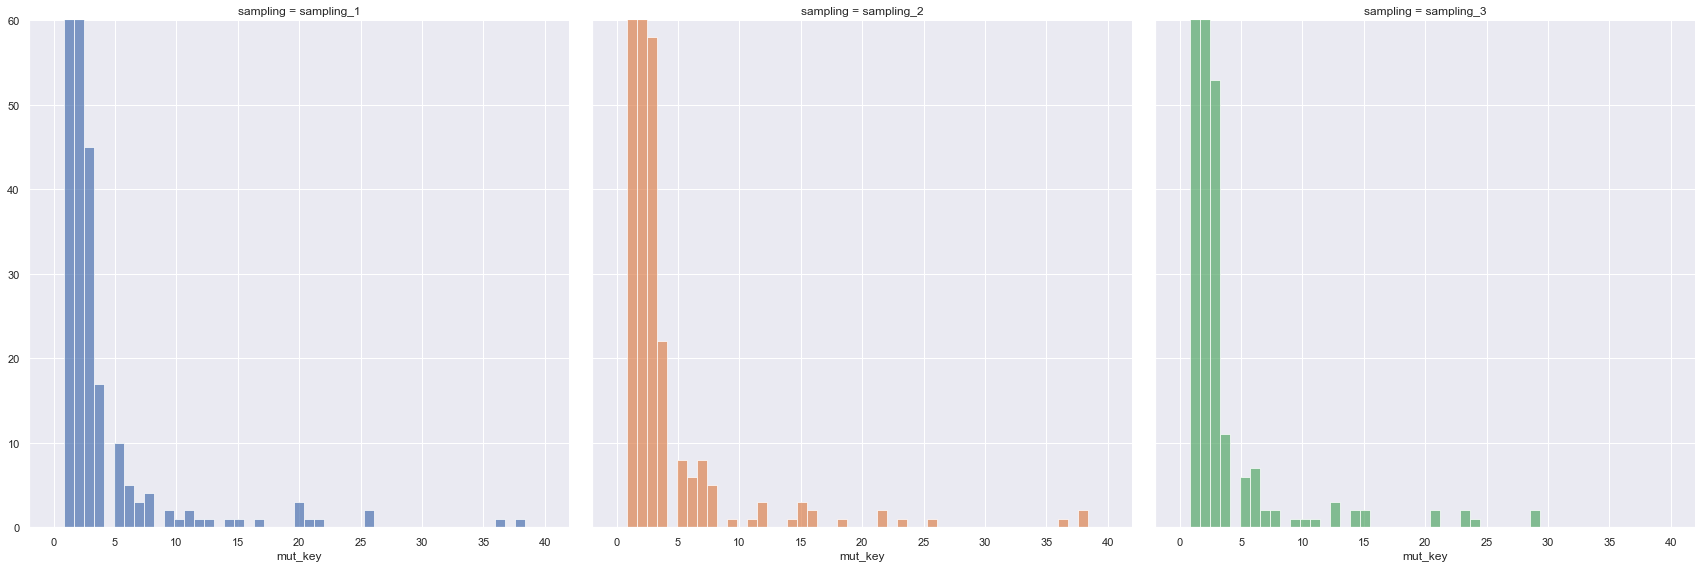

In [5]:
aggregation = {
    'mut_key': 'count',
    'sampling': lambda x: x.iloc[0]
}

grid = seaborn.FacetGrid(data.groupby(['sampling', 'mut_key']).aggregate(aggregation), col='sampling', hue='sampling', margin_titles=True, height=8)
grid.map(plt.hist, 'mut_key', bins=np.linspace(0, 40, 50), alpha=0.7)
plt.ylim(0, 60);

/Users/guilminp/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


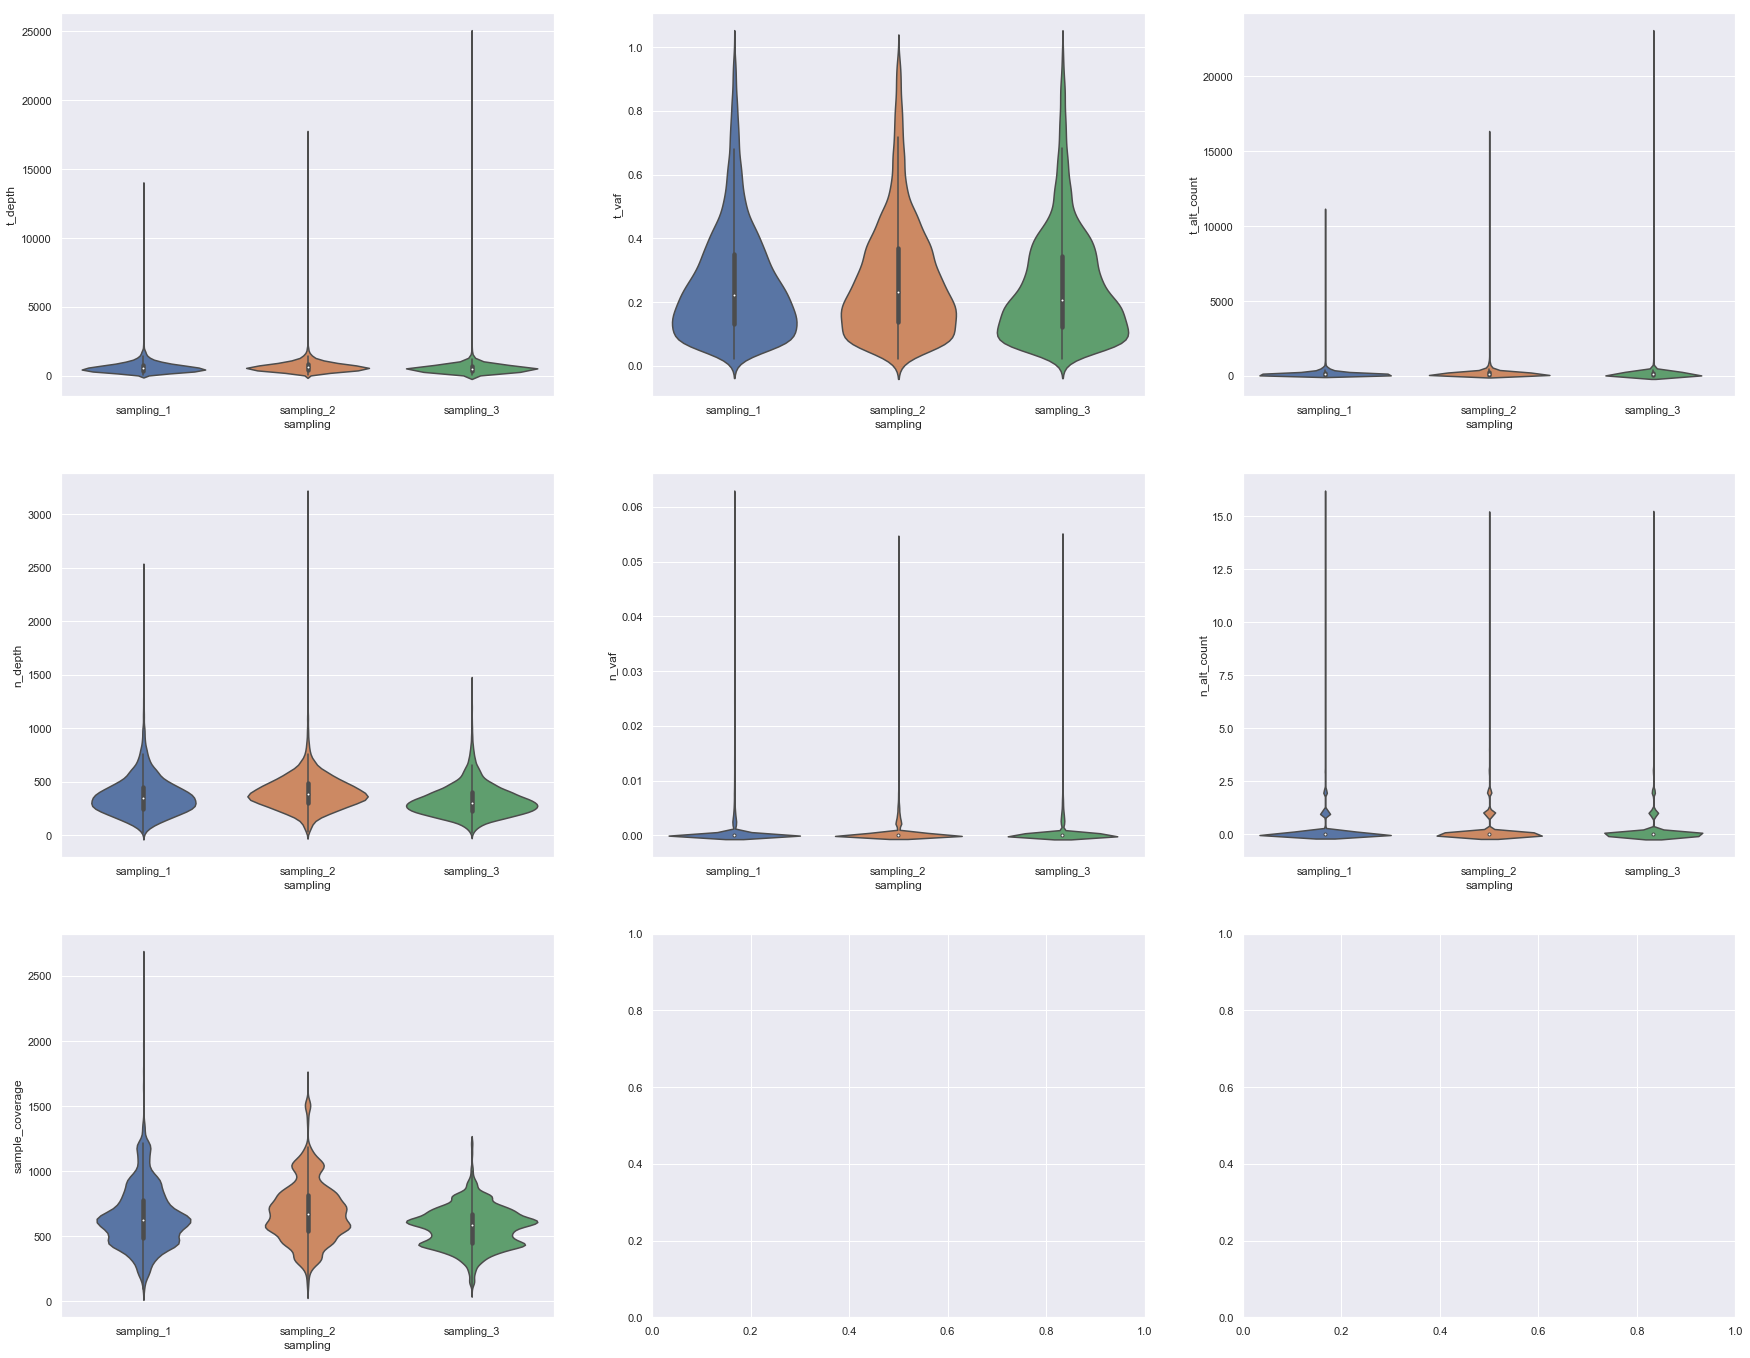

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(30, 24))

for i, feature in enumerate(['t_depth', 't_vaf', 't_alt_count',
                             'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage']):
    #seaborn.catplot(data=data, x='sampling', y=feature, kind='box', flierprops={'marker': 'o', 'markersize': 3}, ax=ax[i // 3, i % 3]);
    seaborn.catplot(data=data, x='sampling', y=feature, kind='violin', ax=ax[i // 3, i % 3])
    plt.close(2)

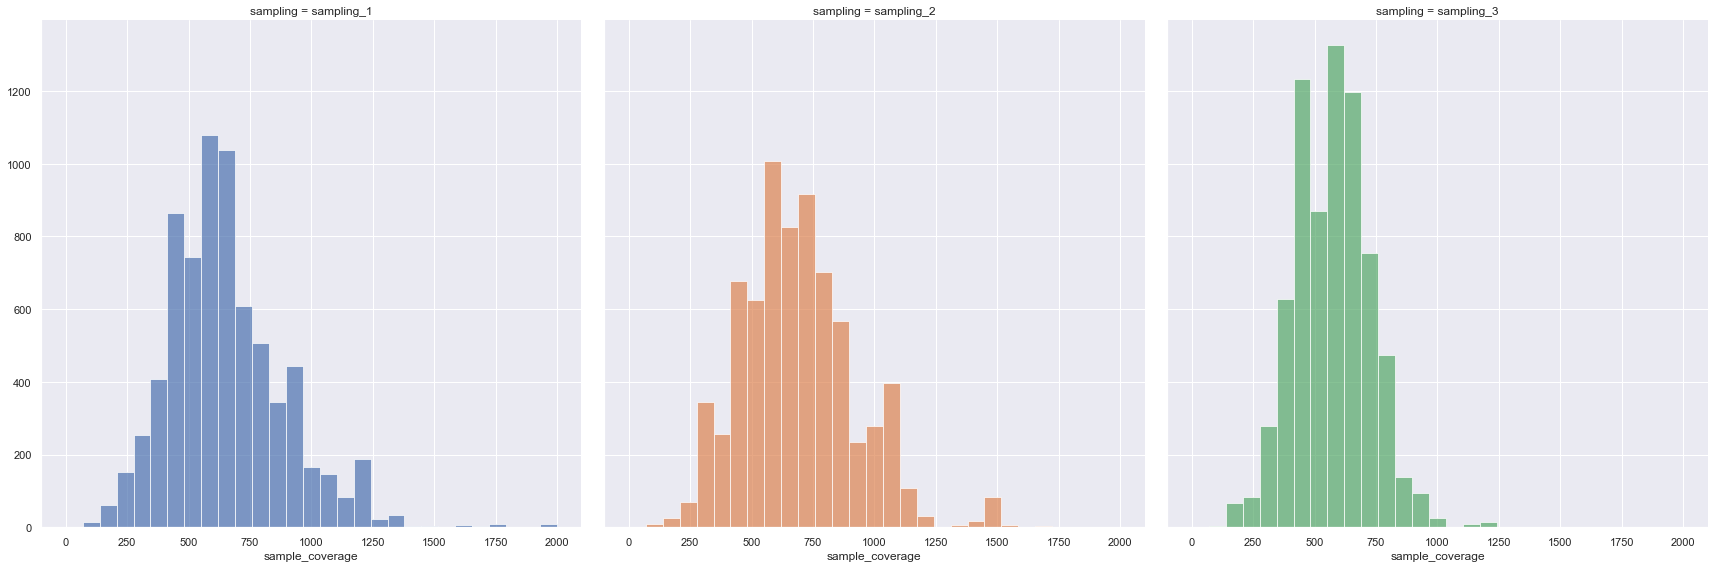

In [7]:
grid = seaborn.FacetGrid(data, col='sampling', hue='sampling', margin_titles=True, height=8)
grid.map(plt.hist, 'sample_coverage', bins=np.linspace(0, 2000, 30), alpha=0.7);

In [8]:
data[data.frequency_in_normals > 0]

Empty DataFrame
Columns: [Hugo_Symbol, Chromosome, Start_Position, End_Position, Consequence, Variant_Type, Reference_Allele, Tumor_Seq_Allele2, Tumor_Sample_Barcode, cDNA_change, HGVSp_Short, t_depth, t_vaf, t_alt_count, n_depth, n_vaf, n_alt_count, t_ref_plus_count, t_ref_neg_count, t_alt_plus_count, t_alt_neg_count, confidence_class, sample_coverage, mut_key, VAG_VT, VAG_GENE, VAG_cDNA_CHANGE, VAG_PROTEIN_CHANGE, VAG_EFFECT, VEP_Consequence, VEP_SYMBOL, VEP_HGVSc, VEP_HGVSp, VEP_Amino_acids, VEP_VARIANT_CLASS, VEP_EXON, VEP_INTRON, VEP_IMPACT, VEP_CLIN_SIG, VEP_COSMIC_CNT, VEP_gnomAD_AF, sample_mut_key, patient_key, frequency_in_normals, VEP_SIFT_class, VEP_SIFT_score, VEP_PolyPhen_class, VEP_PolyPhen_score, VEP_in_dbSNP, VEP_gnomAD_total_AF_AFR, VEP_gnomAD_total_AF_AMR, VEP_gnomAD_total_AF_ASJ, VEP_gnomAD_total_AF_EAS, VEP_gnomAD_total_AF_FIN, VEP_gnomAD_total_AF_NFE, VEP_gnomAD_total_AF_OTH, VEP_gnomAD_total_AF_max, VEP_gnomAD_total_AF, Kaviar_AF, is_a_hotspot, is_a_3d_hotspot, oncogenic, gene_type, is_artefact, sampling]
Index: []

/Users/guilminp/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


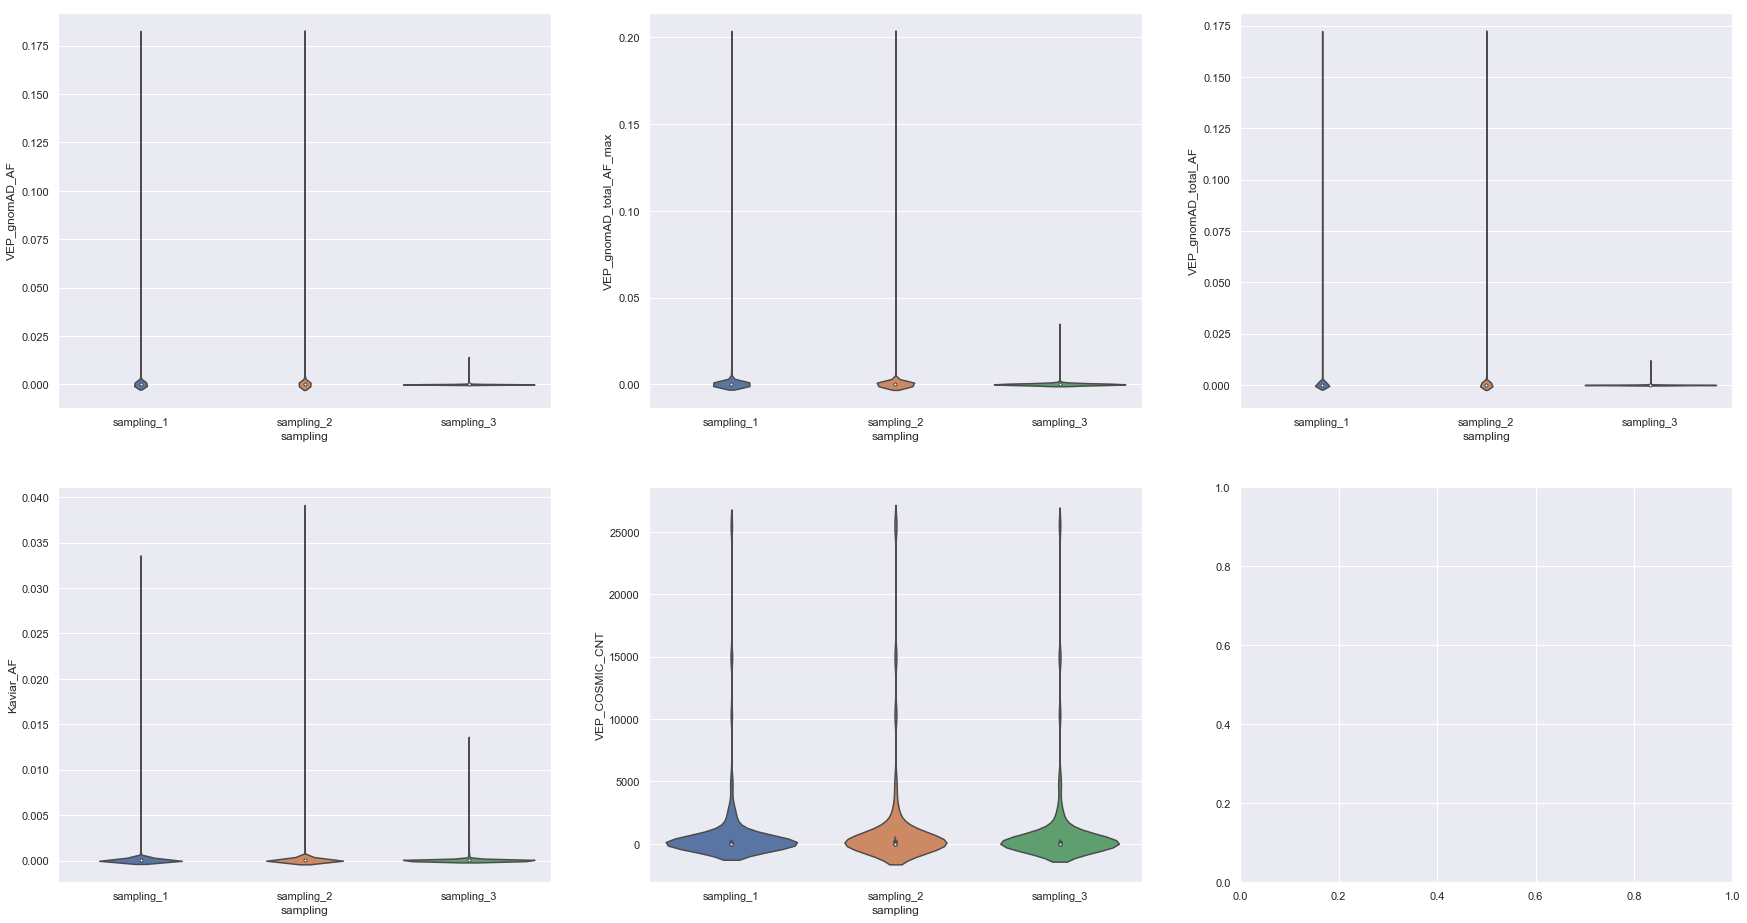

In [9]:
fig, ax = plt.subplots(2, 3, figsize=(30, 16))
for i, feature in enumerate(['VEP_gnomAD_AF', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF',
                             'Kaviar_AF', 'VEP_COSMIC_CNT']):
    seaborn.catplot(data=data[data[feature] > 0], x='sampling', y=feature, kind='violin', ax=ax[i // 3, i % 3])
    plt.close(2)

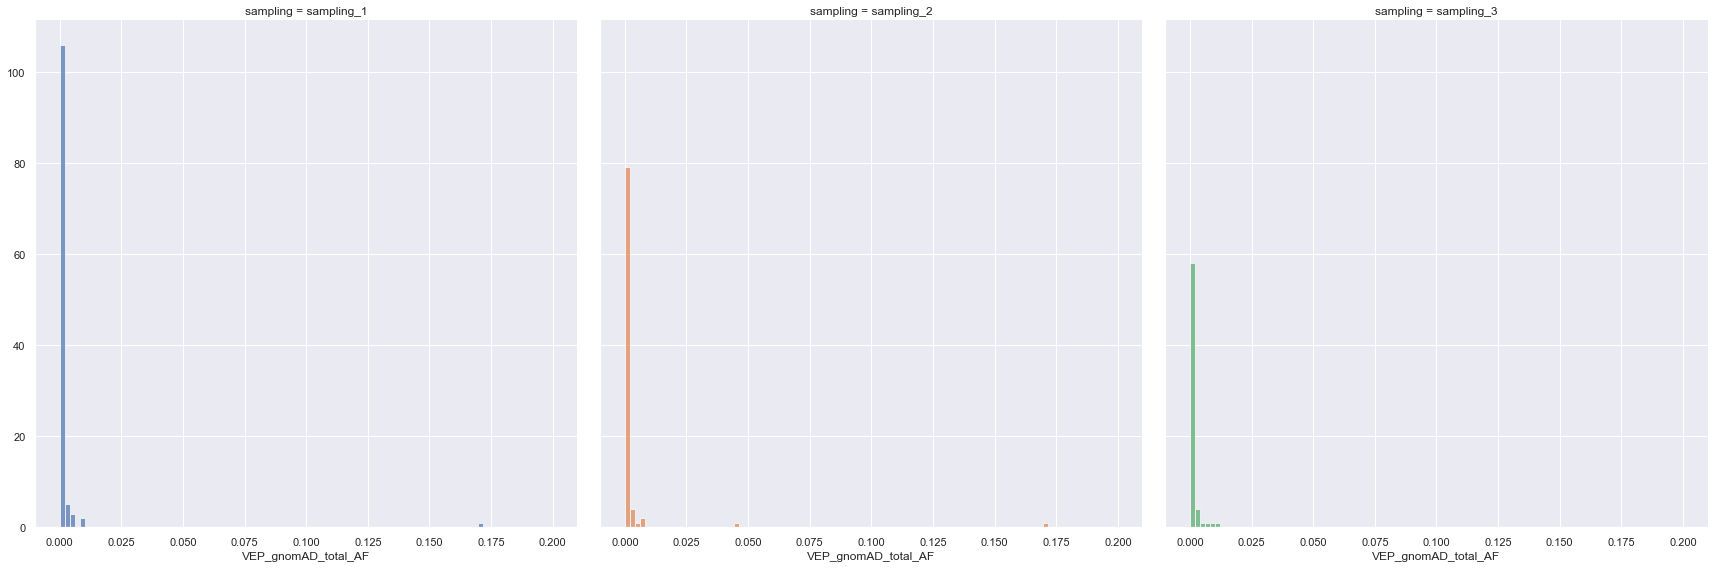

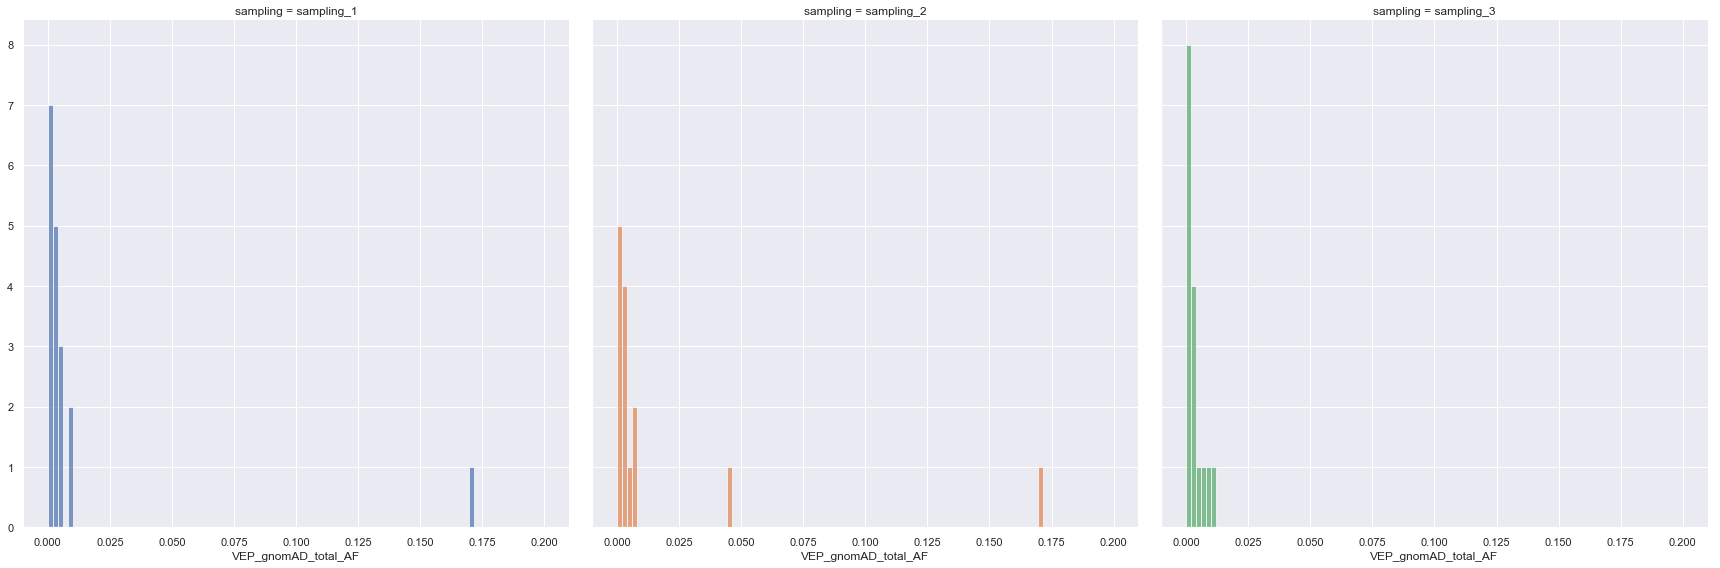

In [10]:
grid = seaborn.FacetGrid(data[data.VEP_gnomAD_total_AF > 0.0001], col='sampling', hue='sampling', margin_titles=True, height=8)
grid.map(plt.hist, 'VEP_gnomAD_total_AF', bins=np.linspace(0, 0.2, 100), alpha=0.7)
grid = seaborn.FacetGrid(data[data.VEP_gnomAD_total_AF > 0.001], col='sampling', hue='sampling', margin_titles=True, height=8)
grid.map(plt.hist, 'VEP_gnomAD_total_AF', bins=np.linspace(0, 0.2, 100), alpha=0.7);

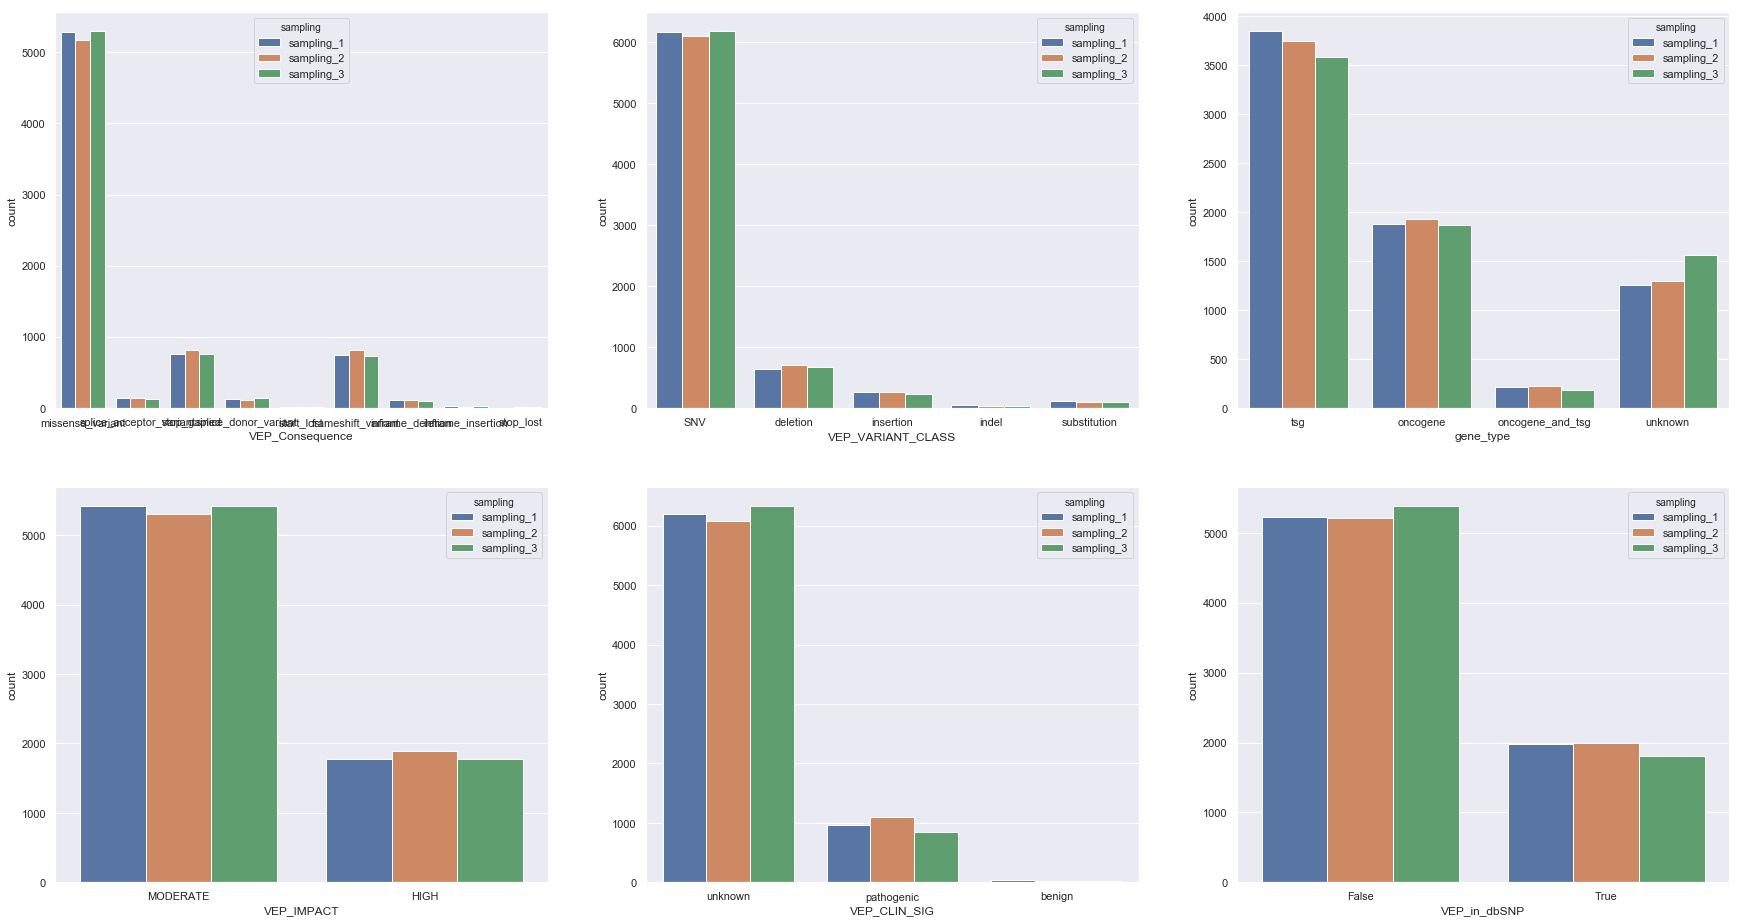

In [11]:
fig, ax = plt.subplots(2, 3, figsize=(30, 16))
for i, feature in enumerate(['VEP_Consequence', 'VEP_VARIANT_CLASS', 'gene_type',
                             'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_in_dbSNP']):
    seaborn.catplot(data=data, hue='sampling', x=feature, kind='count', ax=ax[i // 3, i % 3])
    plt.close(2)

# Test PCA

In [9]:
%matplotlib inline
%run setup_environment.py
%run ml_tools.py
%run custom_tools.py
%run Selene_Job.ipy

current_conda_env = !echo $CONDA_DEFAULT_ENV
check_conda_env(current_conda_env[0])

Setup environment... done!


✅ <span style='color:green'>Working on **impact-annotator_env** conda environment.</span>

In [10]:
# get raw data
impact = pd.read_csv('../../data/annotated_final_IMPACT_mutations_180508.txt', sep = '\t', low_memory = False)

In [11]:
get_table(impact.confidence_class)

count_  freq_
AUTO_OK    180832  93.1%
UNLIKELY     7199   3.7%
MANUAL_OK    6180   3.2%

In [12]:
# create the is_somatic class
impact['is_somatic'] = impact.confidence_class != "UNLIKELY"
get_table(impact.is_somatic)
label_feature_name = 'is_somatic'

In [13]:
# choose features
feature_names = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
                 'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
                 'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
                 'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
                 'gene_type', label_feature_name]
impact = impact[feature_names].dropna()
    
# transform categorical features
categorical_features_names = [ 'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_in_dbSNP', 'gene_type']
impact = pd.get_dummies(impact, columns = categorical_features_names, sparse = True)

# reduced dataset
impact = pd.concat([impact[~impact.is_somatic],
                    impact[impact.is_somatic].iloc[0:20000]], ignore_index = True)

# shuffle data
rng = np.random.RandomState(0)
permutation = rng.permutation(len(impact))
impact = impact.iloc[permutation]

X = impact.drop(label_feature_name, axis = 1)
y = impact[label_feature_name]

In [14]:
print(X.shape)
print(y.shape)
get_table(y)

(27199, 45)
(27199,)


count_  freq_
True    20000  73.5%
False    7199  26.5%

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)

In [16]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [17]:
X_pca = pca.transform(X)

In [18]:
X_pca

array([[-238.00053994,   89.42513399, -251.24476582],
       [-237.54833235,   39.41261791,   20.98535881],
       [-233.39196472,  551.19352457, -130.90283475],
       ...,
       [-237.53470694,  127.78339499,  -10.29614909],
       [-243.56352396, -451.29372839,  139.44827711],
       [-236.34082139,  429.00525086, -738.09187326]])

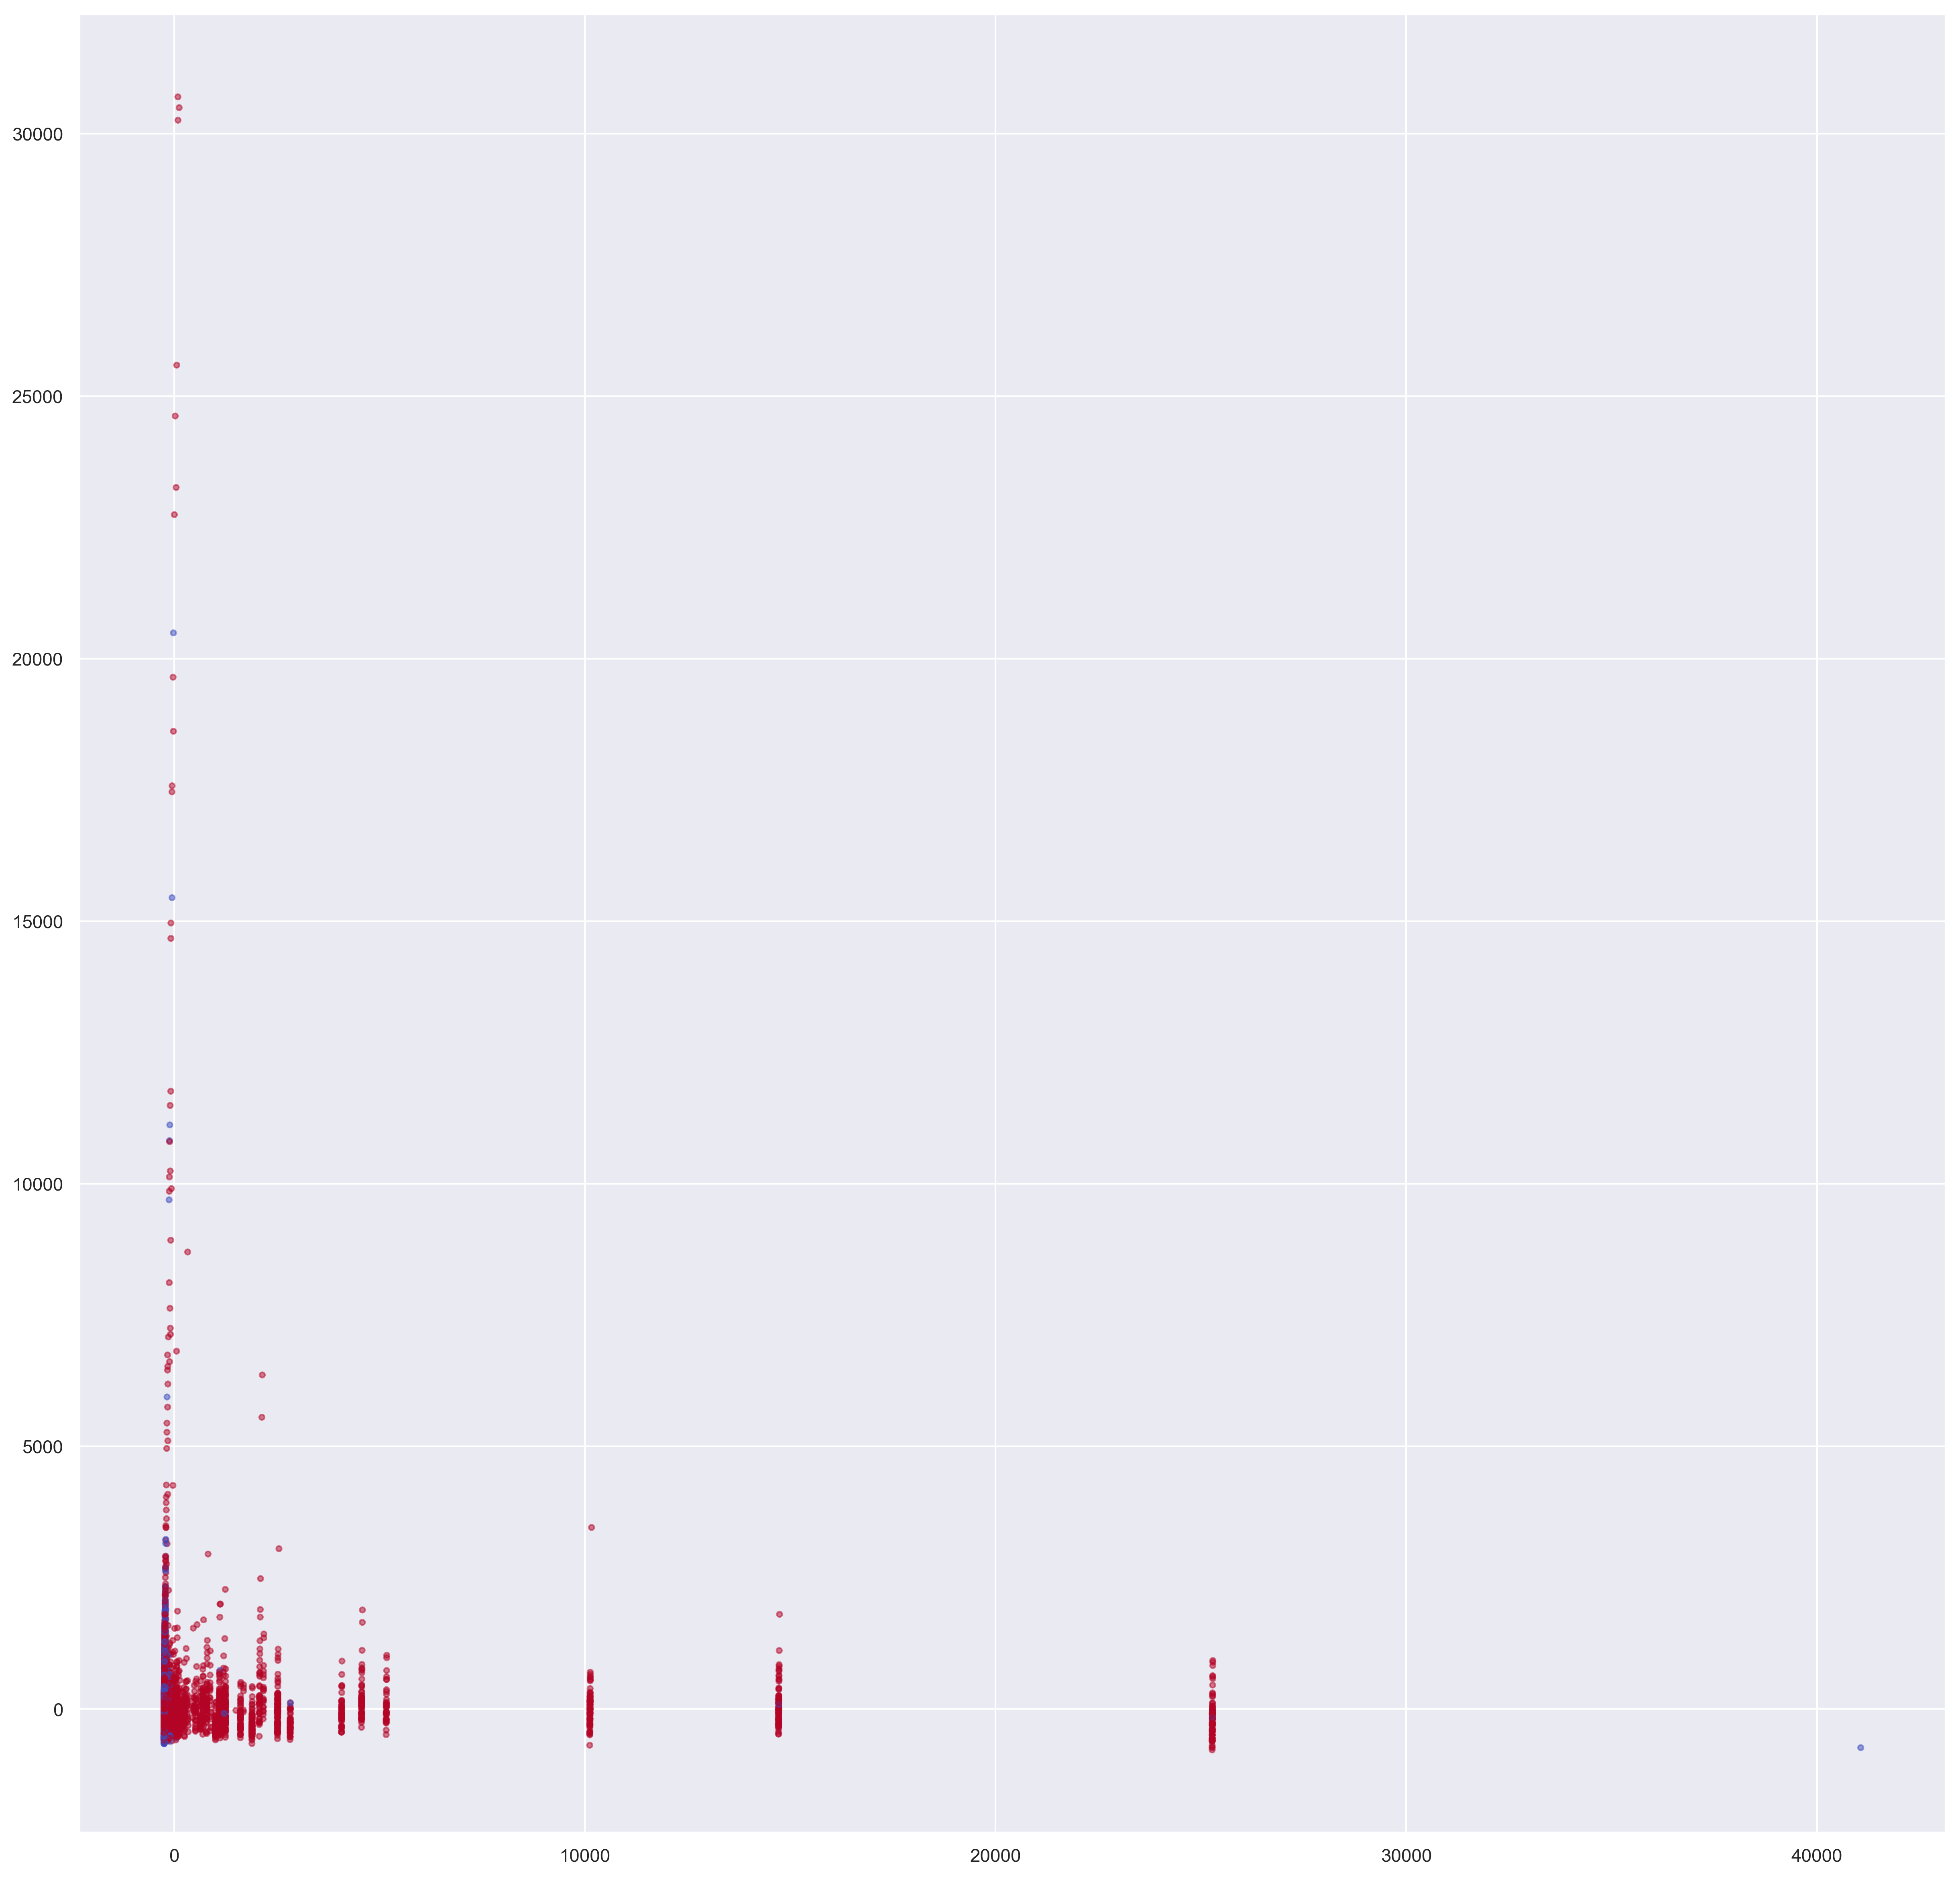

In [25]:
fig = plt.figure(figsize = (20, 20), dpi = 300)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y, s = 10, alpha = 0.5, cmap = plt.cm.coolwarm)

# Sampling

**Goal:** ...
  
This notebook is divided in two parts:
* **1. Bla**

In [1]:
%run ../setup_environment.ipy
%run ../Selene_Job.ipy

Setup environment... done!


<span style="color:green">✅ Working on **impact-annotator_env** conda environment.</span>

## Get the data

In [3]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact')

features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

X, y = data.process(features).get_X_and_y('all', 'all')
Impact_Wrapper.print_info(X, y)

X: (194211, 45) | y: (194211,)


count_  freq_
False  187012  96.3%
True     7199   3.7%

## Set cross-validation strategies

We choose stratified folds (made by preserving the percentage of samples for each class) for both outer and nested cross-validation.

In [4]:
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

In [5]:
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler

In [6]:
summary = Summary()

## Ridge Regression (L2 regularization)

In [7]:
metrics_list = []

In [8]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

for i, seed in enumerate([0, 1, 12, 1672, 456782]):
    print_md('**sampling {}** (seed = {})'.format(i, seed))
    
    model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=seed),
                          StandardScaler(),
                          LogisticRegressionCV(cv=nested_cv_strategy, scoring='roc_auc', random_state=42))
    
    metrics_list.append(Metrics(model, X, y, cv_strategy, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall']))
    # metrics_list[-1].print_mean()

**sampling 0** (seed = 0)

Run model... done! (9.89s)


**sampling 1** (seed = 1)

Run model... done! (9.23s)


**sampling 2** (seed = 12)

Run model... done! (11.52s)


**sampling 3** (seed = 1672)

Run model... done! (10.16s)


**sampling 4** (seed = 456782)

Run model... done! (8.51s)


**sampling 0**

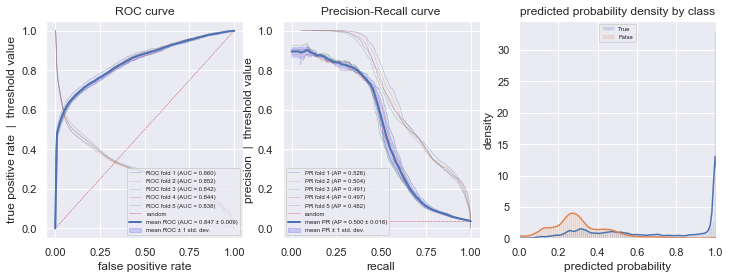

**sampling 1**

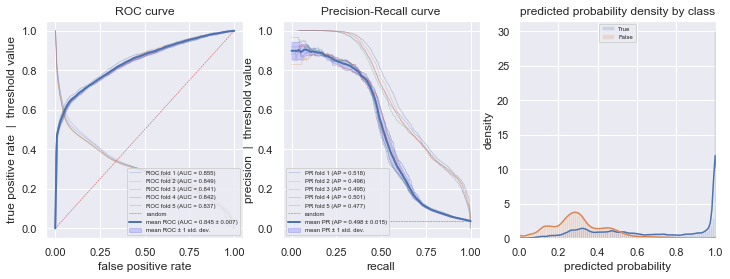

**sampling 2**

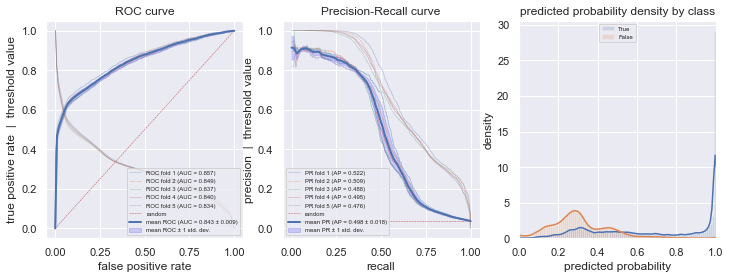

**sampling 3**

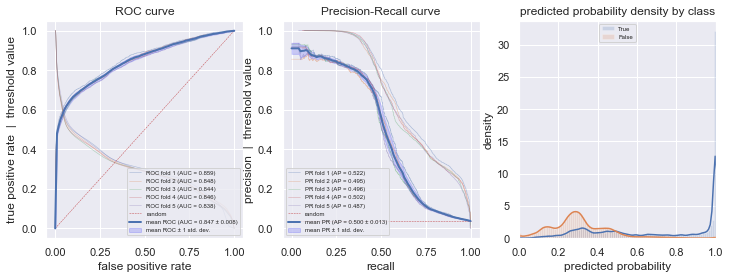

**sampling 4**

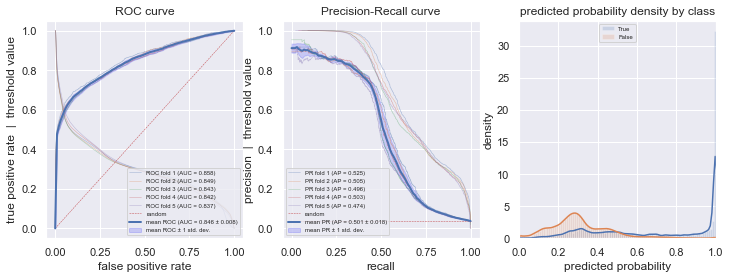

In [9]:
for i, metrics in enumerate(metrics_list):
    print_md('**sampling {}**'.format(i))
    metrics.plot_threshold_decision_curves(figsize=(12, 4))
    plt.show()

**sampling 0**

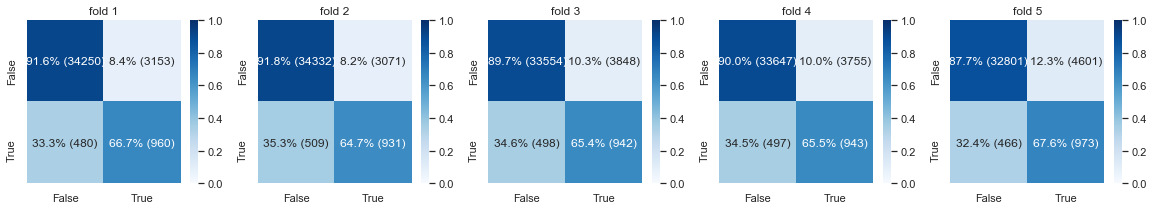

**sampling 1**

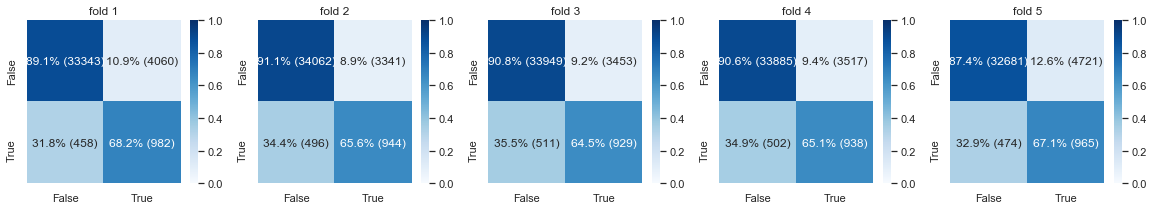

**sampling 2**

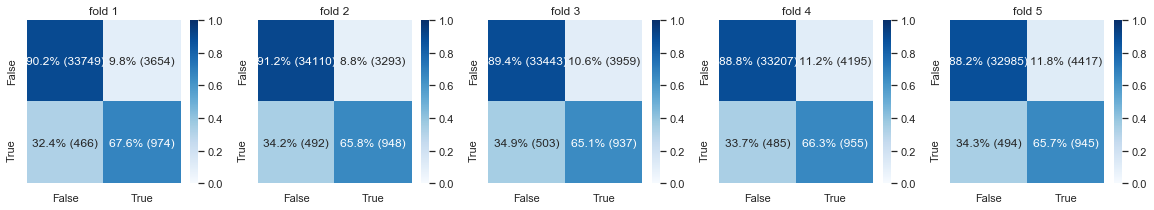

**sampling 3**

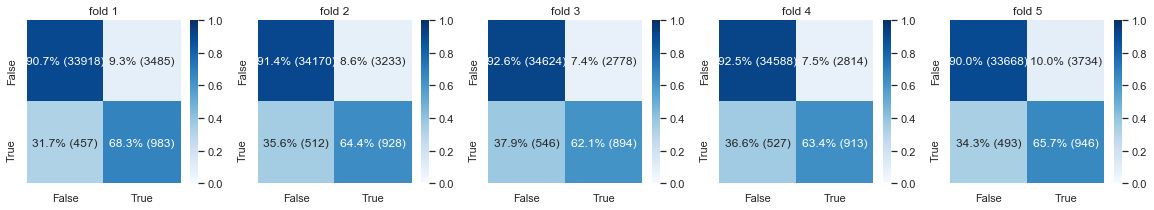

**sampling 4**

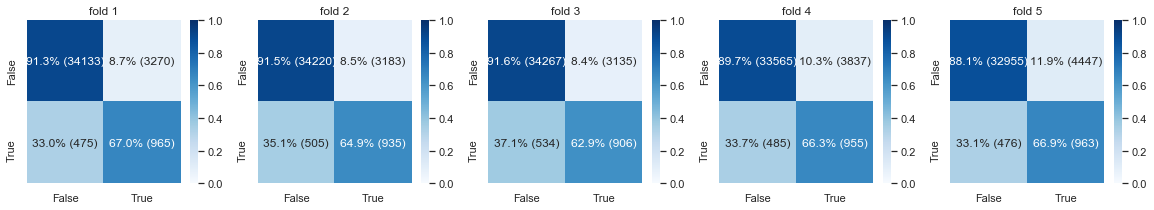

In [10]:
for i, metrics in enumerate(metrics_list):
    print_md('**sampling {}**'.format(i))
    metrics.plot_confusion_matrix()
    plt.show()

In [11]:
for i, color in enumerate(['firebrick', 'crimson', 'tomato', 'coral', 'lightcoral']):
    summary.add(metrics_list[i], 'RidgeRegression_sampling_{}'.format(i), color)

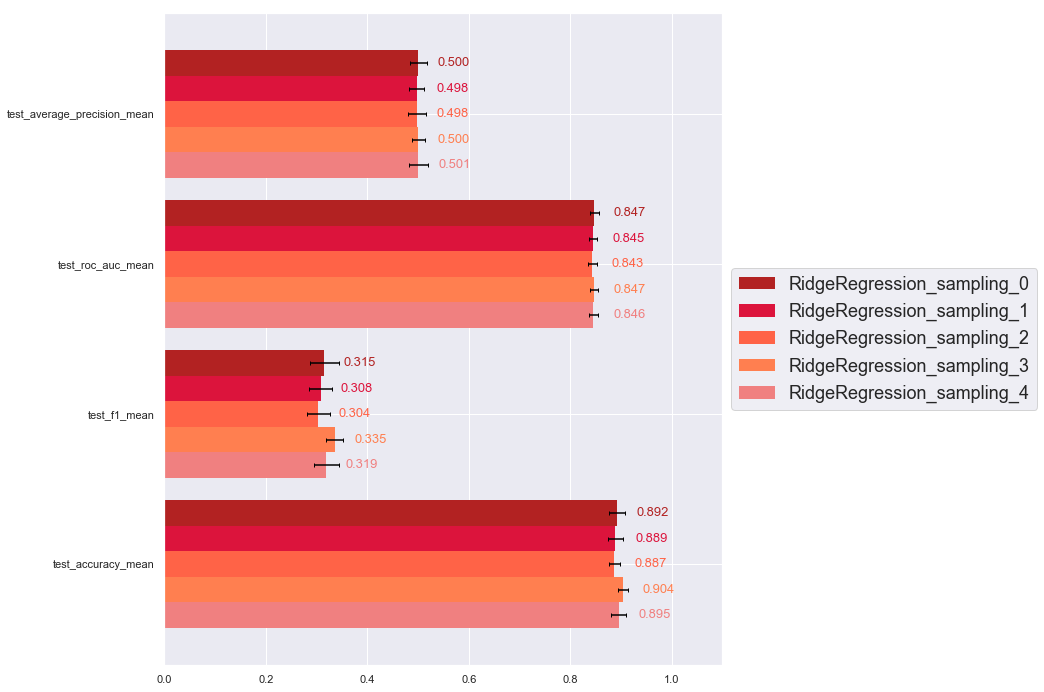

In [12]:
summary.display()
summary.plot()

## Random Forest

In [13]:
job_list = []
for i in range(5):
    job_list.append(Selene_Job('RandomForest_sampling_{}'.format(i), 'guilminp', '/home/guilminp/impact-annotator', '../ssh_remote_jobs'))

<span style="color:red">Job < RandomForest_sampling_0 >: </span>⚠️ job already exists, please remove it with `job.remove()` or use `load_from_id = True` to reload the existing job<br>

<span style="color:red">Job < RandomForest_sampling_1 >: </span>⚠️ job already exists, please remove it with `job.remove()` or use `load_from_id = True` to reload the existing job<br>

<span style="color:red">Job < RandomForest_sampling_2 >: </span>⚠️ job already exists, please remove it with `job.remove()` or use `load_from_id = True` to reload the existing job<br>

<span style="color:red">Job < RandomForest_sampling_3 >: </span>⚠️ job already exists, please remove it with `job.remove()` or use `load_from_id = True` to reload the existing job<br>

<span style="color:red">Job < RandomForest_sampling_4 >: </span>⚠️ job already exists, please remove it with `job.remove()` or use `load_from_id = True` to reload the existing job<br>

In [24]:
job_list = []
for i in range(5):
    job_list.append(Selene_Job('RandomForest_sampling_{}'.format(i), 'guilminp', '/home/guilminp/impact-annotator', '../ssh_remote_jobs', load_from_id=True))

<span style="color:green">Job < RandomForest_sampling_0 >: </span>✅ job found and reloaded

<span style="color:green">Job < RandomForest_sampling_1 >: </span>✅ job found and reloaded

<span style="color:green">Job < RandomForest_sampling_2 >: </span>✅ job found and reloaded

<span style="color:green">Job < RandomForest_sampling_3 >: </span>✅ job found and reloaded

<span style="color:green">Job < RandomForest_sampling_4 >: </span>✅ job found and reloaded

In [25]:
for job in job_list:
    job.load_data(X, y)

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_sampling_0


<span style="color:green">Job < RandomForest_sampling_0 >: </span>✅ data loaded

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_sampling_1


<span style="color:green">Job < RandomForest_sampling_1 >: </span>✅ data loaded

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_sampling_2


<span style="color:green">Job < RandomForest_sampling_2 >: </span>✅ data loaded

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_sampling_3


<span style="color:green">Job < RandomForest_sampling_3 >: </span>✅ data loaded

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_sampling_4


<span style="color:green">Job < RandomForest_sampling_4 >: </span>✅ data loaded

:warning: CELL RAN USING FOR [0, 1, 2, 3, 4] [0, 1, 12, 1672, 456782] 

In [30]:
%%writefile {job_list[4].script_path}

# load the ml_tools functions
%run ../../metrics.py

# load the features matrix and target array
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')

# setup cross-validation and import modules
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

# setup imblearn
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler

# choose a model and run it
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters_grid = [
    {'randomforestclassifier__n_estimators': [100, 500, 1000, 1500], 'randomforestclassifier__criterion': ['gini', 'entropy'], 'randomforestclassifier__max_depth': [5, 10, 20, 30, 40]}
]

pipe = make_pipeline(RandomUnderSampler(ratio='majority', random_state=456782),
                     RandomForestClassifier(random_state=42))

model = GridSearchCV(pipe, parameters_grid, cv=nested_cv_strategy, scoring='roc_auc', refit=True, return_train_score=True)
metrics = Metrics(model, X, y, cv_strategy, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall'])

# save the metrics
print('Save metrics...', end='')
metrics.save()
print(' done!')

Overwriting ../ssh_remote_jobs/job_RandomForest_sampling_4/script.ipy


In [31]:
for job in job_list:
    job.run(n_jobs=10, short_job=True, memory=16)

➞ scp ../ssh_remote_jobs/job_RandomForest_sampling_0 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1535    14.2KB/s   00:00    
metrics.pkl                                   100% 6466KB   9.1MB/s   00:00    
script.ipy                                    100% 1265    22.8KB/s   00:00    
X.pkl                                         100%   43MB  14.3MB/s   00:03    
y.pkl                                         100%  190KB   3.1MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_0
Job <28930822> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_sampling_0 -We 59 -n 10 -R "span[ptile=5,mem=16]" "ipython script.ipy"

<span style="color:green">Job < RandomForest_sampling_0 >: </span>✅ submitted<br>

➞ scp ../ssh_remote_jobs/job_RandomForest_sampling_1 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1535    36.1KB/s   00:00    
metrics.pkl                                   100% 6482KB   9.0MB/s   00:00    
script.ipy                                    100% 1265    35.3KB/s   00:00    
X.pkl                                         100%   43MB  14.3MB/s   00:03    
y.pkl                                         100%  190KB   2.8MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_1
Job <28930823> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_sampling_1 -We 59 -n 10 -R "span[ptile=5,mem=16]" "ipython script.ipy"

<span style="color:green">Job < RandomForest_sampling_1 >: </span>✅ submitted<br>

➞ scp ../ssh_remote_jobs/job_RandomForest_sampling_2 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1535    36.9KB/s   00:00    
metrics.pkl                                   100% 6463KB  10.1MB/s   00:00    
script.ipy                                    100% 1266    53.2KB/s   00:00    
X.pkl                                         100%   43MB  14.3MB/s   00:03    
y.pkl                                         100%  190KB   1.0MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_2
Job <28930825> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_sampling_2 -We 59 -n 10 -R "span[ptile=5,mem=16]" "ipython script.ipy"

<span style="color:green">Job < RandomForest_sampling_2 >: </span>✅ submitted<br>

➞ scp ../ssh_remote_jobs/job_RandomForest_sampling_3 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1535    28.4KB/s   00:00    
metrics.pkl                                   100% 6457KB   9.0MB/s   00:00    
script.ipy                                    100% 1268    45.7KB/s   00:00    
X.pkl                                         100%   43MB   7.2MB/s   00:06    
y.pkl                                         100%  190KB   3.3MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_3
Job <28930834> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_sampling_3 -We 59 -n 10 -R "span[ptile=5,mem=16]" "ipython script.ipy"

<span style="color:green">Job < RandomForest_sampling_3 >: </span>✅ submitted<br>

➞ scp ../ssh_remote_jobs/job_RandomForest_sampling_4 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1535     9.6KB/s   00:00    
metrics.pkl                                   100% 6459KB   1.6MB/s   00:04    
script.ipy                                    100% 1270    40.1KB/s   00:00    
X.pkl                                         100%   43MB  10.7MB/s   00:04    
y.pkl                                         100%  190KB   2.4MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_4
Job <28931012> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_sampling_4 -We 59 -n 10 -R "span[ptile=5,mem=16]" "ipython script.ipy"

<span style="color:green">Job < RandomForest_sampling_4 >: </span>✅ submitted<br>

In [33]:
for job in job_list:
    job.get_results()

<span style="color:green">Job < RandomForest_sampling_0 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_0 to ../ssh_remote_jobs/job_RandomForest_sampling_0
metrics.pkl                                   100% 6378KB   7.9MB/s   00:00    
job_output.txt                                100% 1535    73.9KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.893 ± 0.005
▴ Mean f1               : 0.339 ± 0.012
▴ Mean roc_auc          : 0.894 ± 0.004
▴ Mean average_precision: 0.589 ± 0.013


<span style="color:green">Job < RandomForest_sampling_1 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_1 to ../ssh_remote_jobs/job_RandomForest_sampling_1
metrics.pkl                                   100% 6395KB  10.0MB/s   00:00    
job_output.txt                                100% 1535    64.0KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.895 ± 0.007
▴ Mean f1               : 0.341 ± 0.015
▴ Mean roc_auc          : 0.894 ± 0.003
▴ Mean average_precision: 0.582 ± 0.008


<span style="color:green">Job < RandomForest_sampling_2 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_2 to ../ssh_remote_jobs/job_RandomForest_sampling_2
metrics.pkl                                   100% 6431KB   9.7MB/s   00:00    
job_output.txt                                100% 1535    59.9KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.896 ± 0.009
▴ Mean f1               : 0.344 ± 0.014
▴ Mean roc_auc          : 0.894 ± 0.004
▴ Mean average_precision: 0.585 ± 0.010


<span style="color:green">Job < RandomForest_sampling_3 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_3 to ../ssh_remote_jobs/job_RandomForest_sampling_3
metrics.pkl                                   100% 6369KB   9.8MB/s   00:00    
job_output.txt                                100% 1535    79.7KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.893 ± 0.007
▴ Mean f1               : 0.340 ± 0.010
▴ Mean roc_auc          : 0.894 ± 0.004
▴ Mean average_precision: 0.590 ± 0.012


<span style="color:green">Job < RandomForest_sampling_4 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_sampling_4 to ../ssh_remote_jobs/job_RandomForest_sampling_4
metrics.pkl                                   100% 6426KB   9.4MB/s   00:00    
job_output.txt                                100% 1535    53.6KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.889 ± 0.007
▴ Mean f1               : 0.332 ± 0.013
▴ Mean roc_auc          : 0.894 ± 0.003
▴ Mean average_precision: 0.586 ± 0.009


**sampling 4**

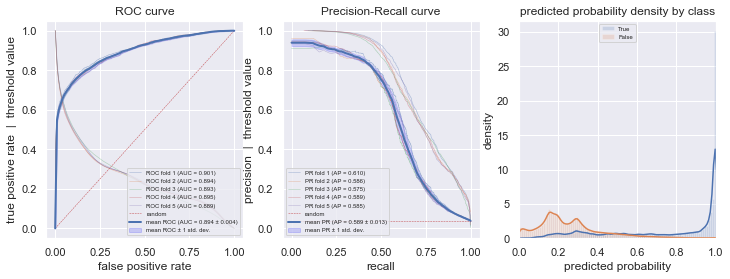

**sampling 4**

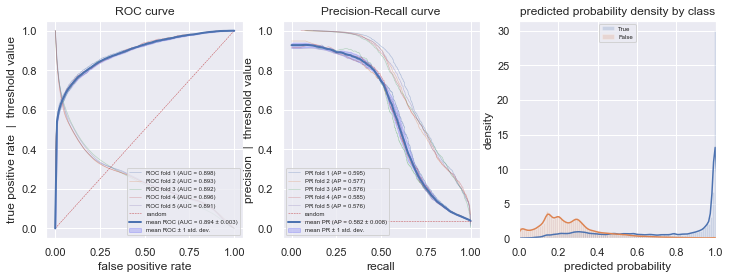

**sampling 4**

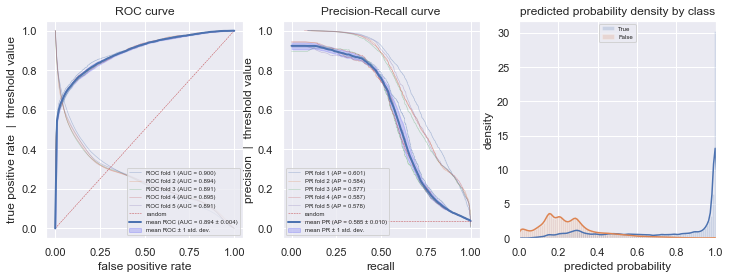

**sampling 4**

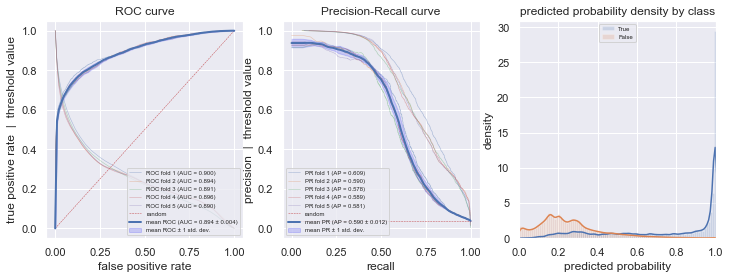

**sampling 4**

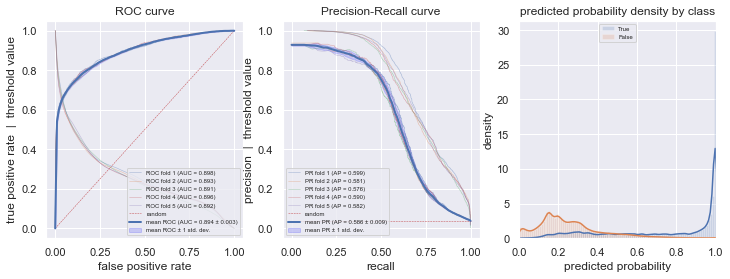

In [34]:
for job in job_list:
    if hasattr(job, 'metrics'):
        print_md('**sampling {}**'.format(i))
        job.metrics.plot_threshold_decision_curves(figsize=(12, 4))
        plt.show()

**sampling 4**

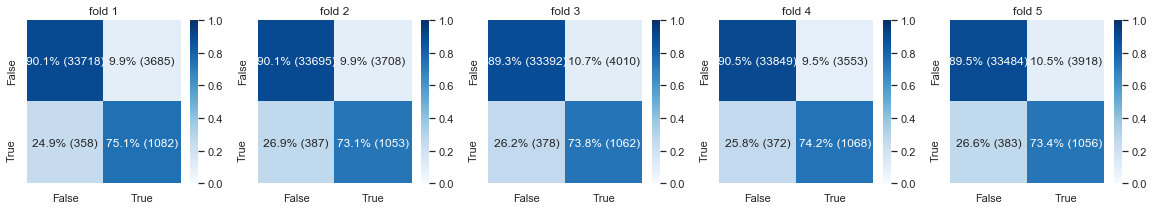

**sampling 4**

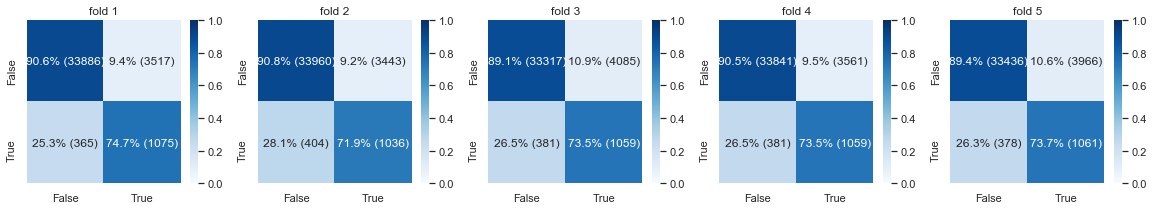

**sampling 4**

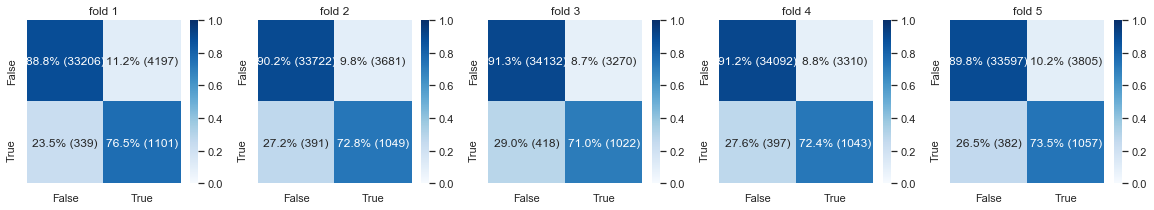

**sampling 4**

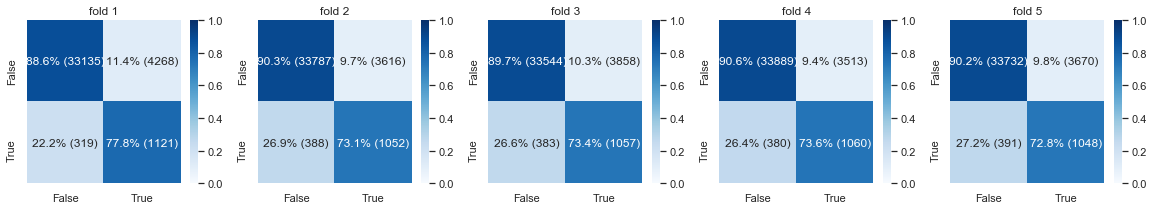

**sampling 4**

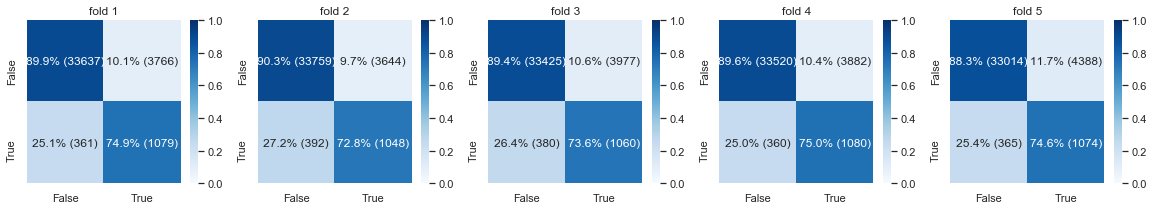

In [35]:
for job in job_list:
    if hasattr(job, 'metrics'):
        print_md('**sampling {}**'.format(i))
        job.metrics.plot_confusion_matrix()
        plt.show()

**sampling 4**

3 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → randomforestclassifier__criterion   : ['entropy' 'gini']
  → randomforestclassifier__max_depth   : [5 10 20 30 40]
  → randomforestclassifier__n_estimators: [100 500 1000 1500]
Best hyperparameters for each fold:
fold 0: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 1: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 2: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 3: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 4: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifie

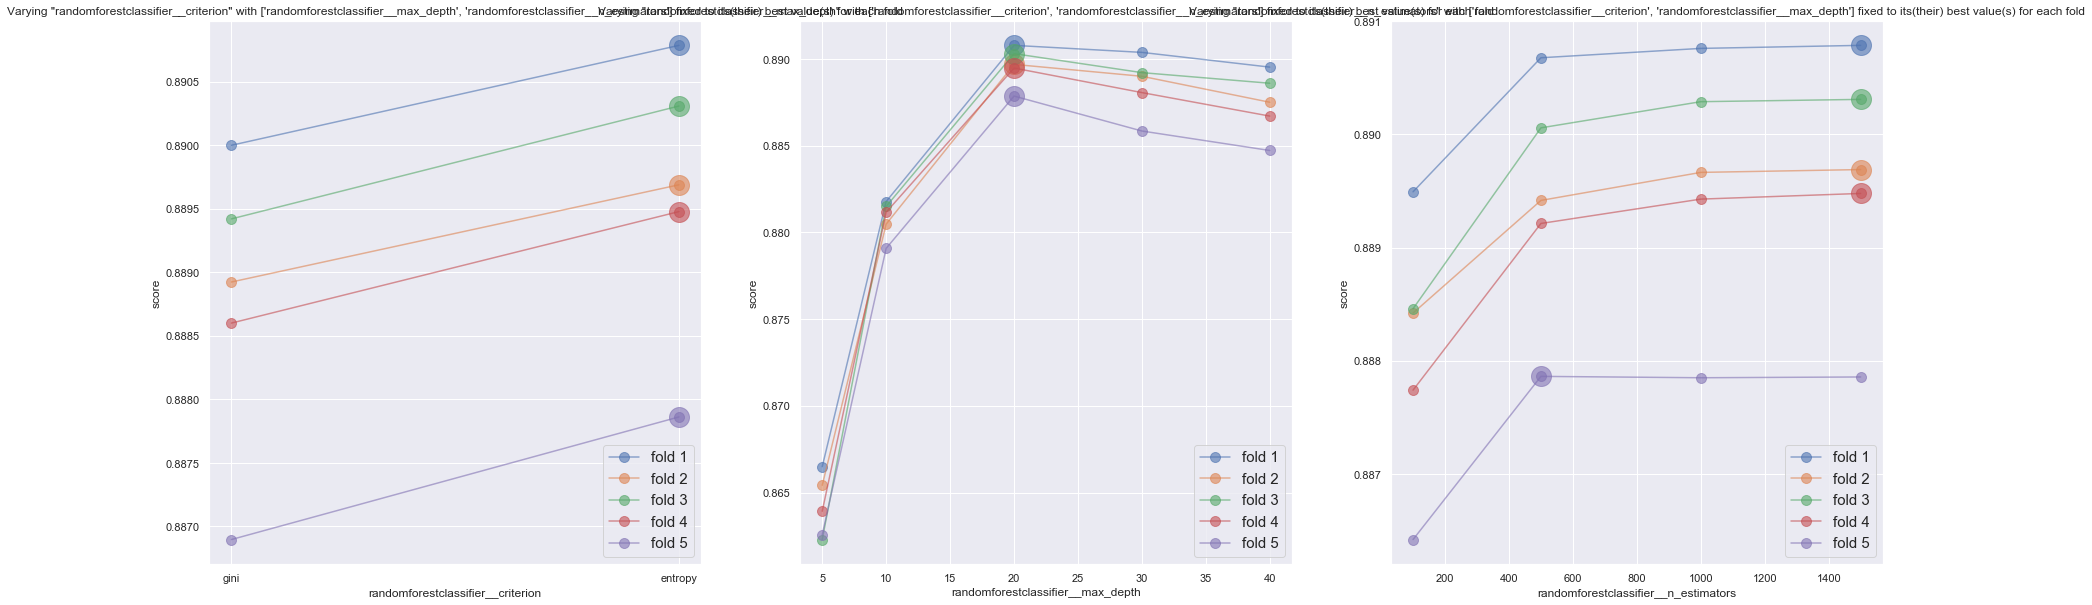

**sampling 4**

3 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → randomforestclassifier__criterion   : ['entropy' 'gini']
  → randomforestclassifier__max_depth   : [5 10 20 30 40]
  → randomforestclassifier__n_estimators: [100 500 1000 1500]
Best hyperparameters for each fold:
fold 0: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 1: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 2: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 3: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 4: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifie

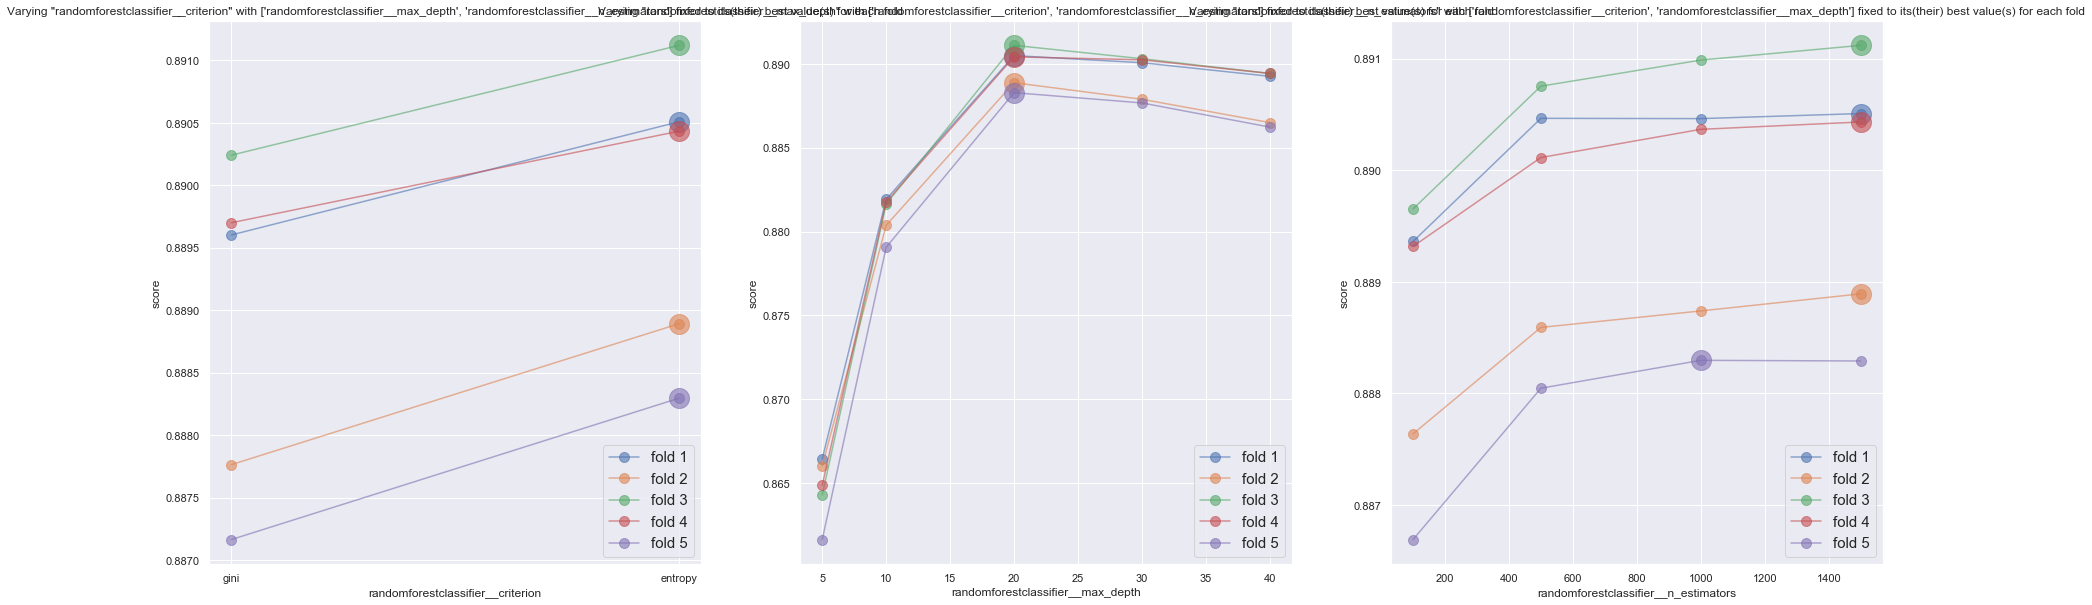

**sampling 4**

3 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → randomforestclassifier__criterion   : ['entropy' 'gini']
  → randomforestclassifier__max_depth   : [5 10 20 30 40]
  → randomforestclassifier__n_estimators: [100 500 1000 1500]
Best hyperparameters for each fold:
fold 0: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1000}
fold 1: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1000}
fold 2: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 3: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 4: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifie

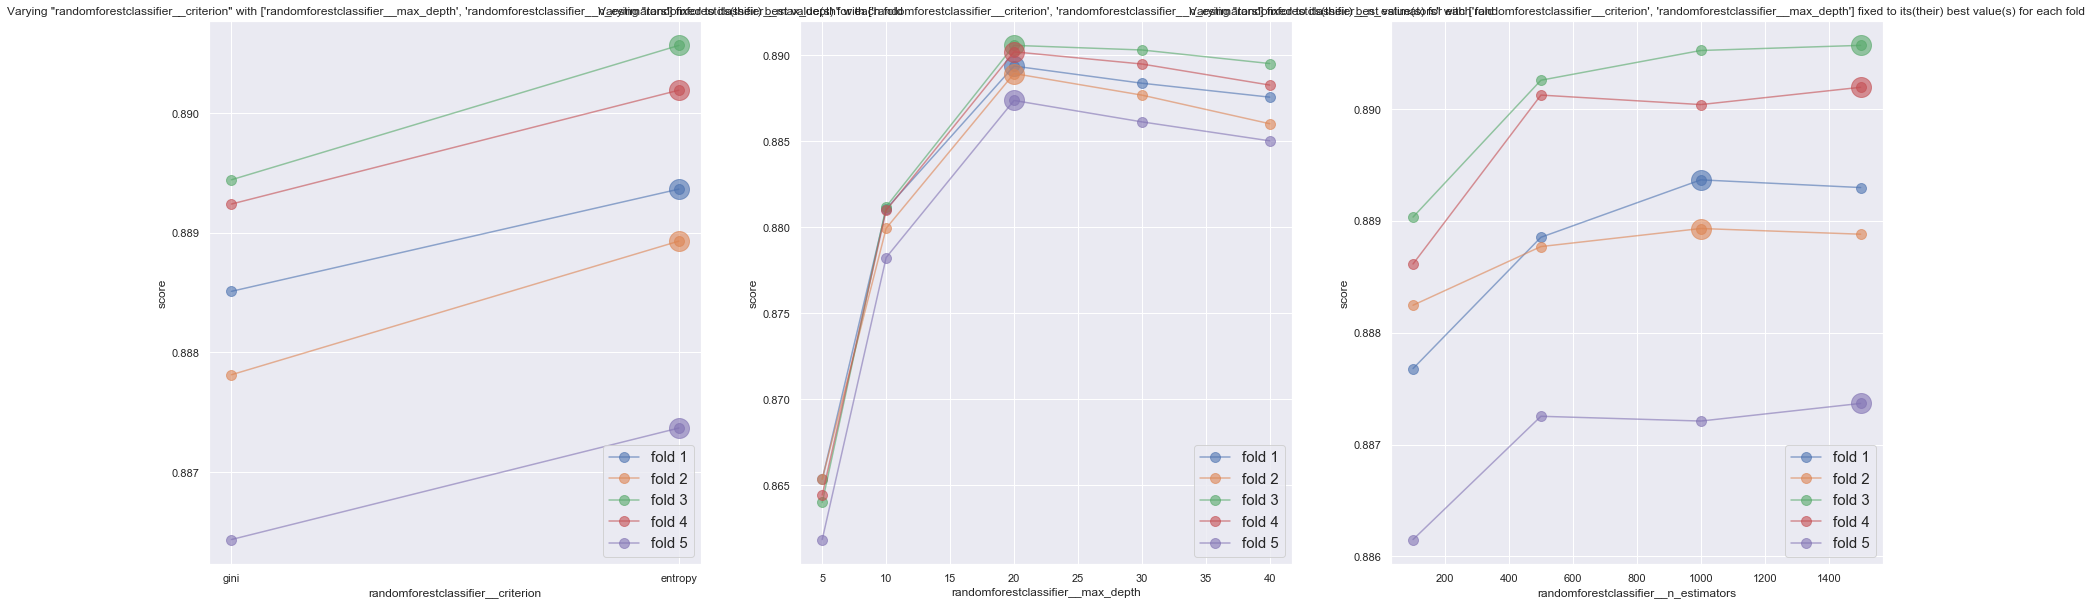

**sampling 4**

3 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → randomforestclassifier__criterion   : ['entropy' 'gini']
  → randomforestclassifier__max_depth   : [5 10 20 30 40]
  → randomforestclassifier__n_estimators: [100 500 1000 1500]
Best hyperparameters for each fold:
fold 0: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1000}
fold 1: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1000}
fold 2: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 3: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 4: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifie

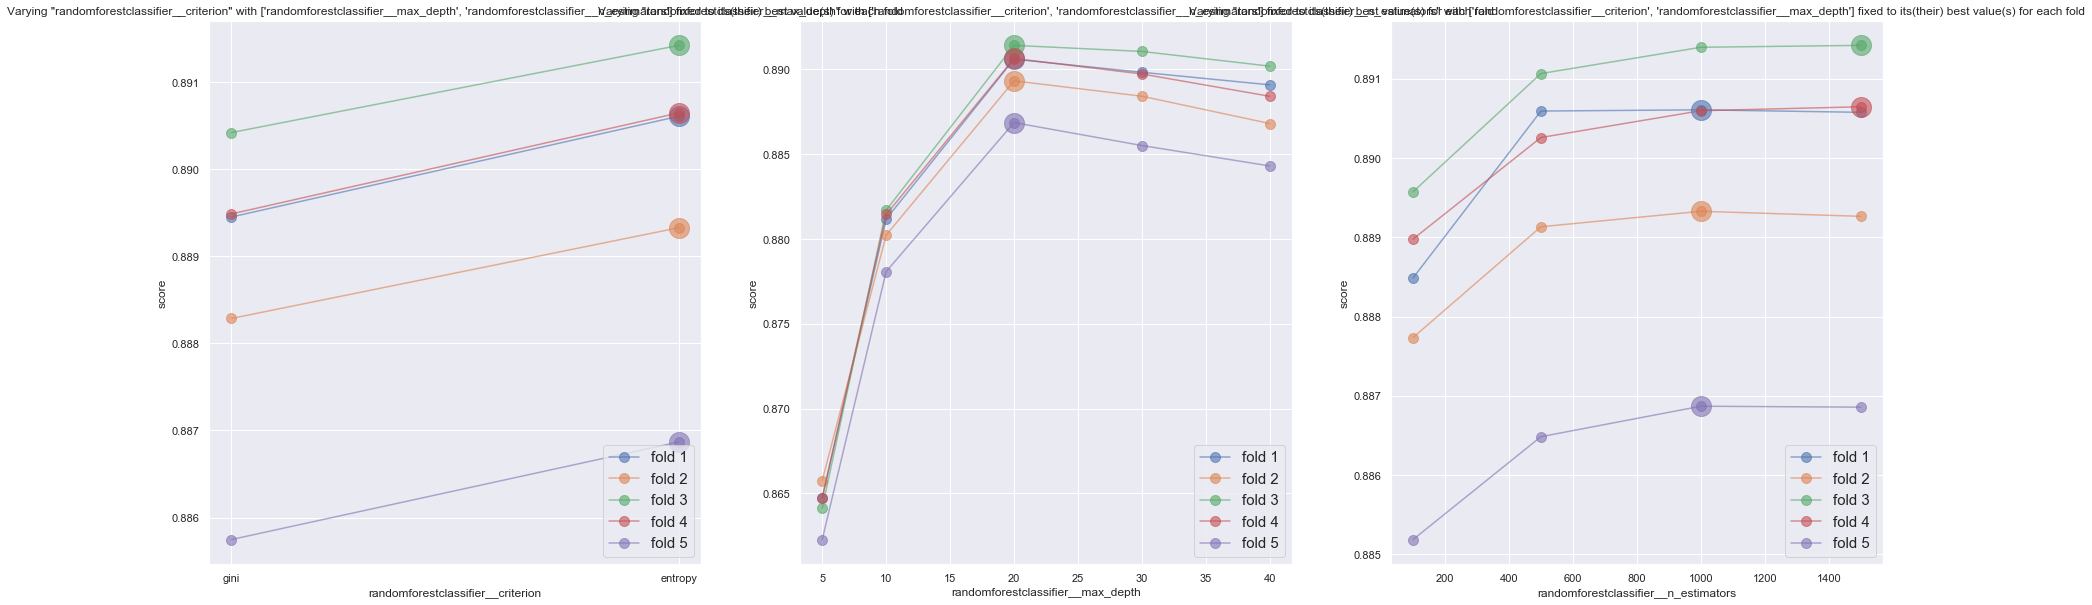

**sampling 4**

3 hyperparameters tuned for 5 different folds (over a 3-fold nested cross-validation):
  → randomforestclassifier__criterion   : ['entropy' 'gini']
  → randomforestclassifier__max_depth   : [5 10 20 30 40]
  → randomforestclassifier__n_estimators: [100 500 1000 1500]
Best hyperparameters for each fold:
fold 0: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 1: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 2: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1500}
fold 3: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__n_estimators': 1000}
fold 4: {'randomforestclassifier__criterion': 'entropy', 'randomforestclassifier__max_depth': 20, 'randomforestclassifie

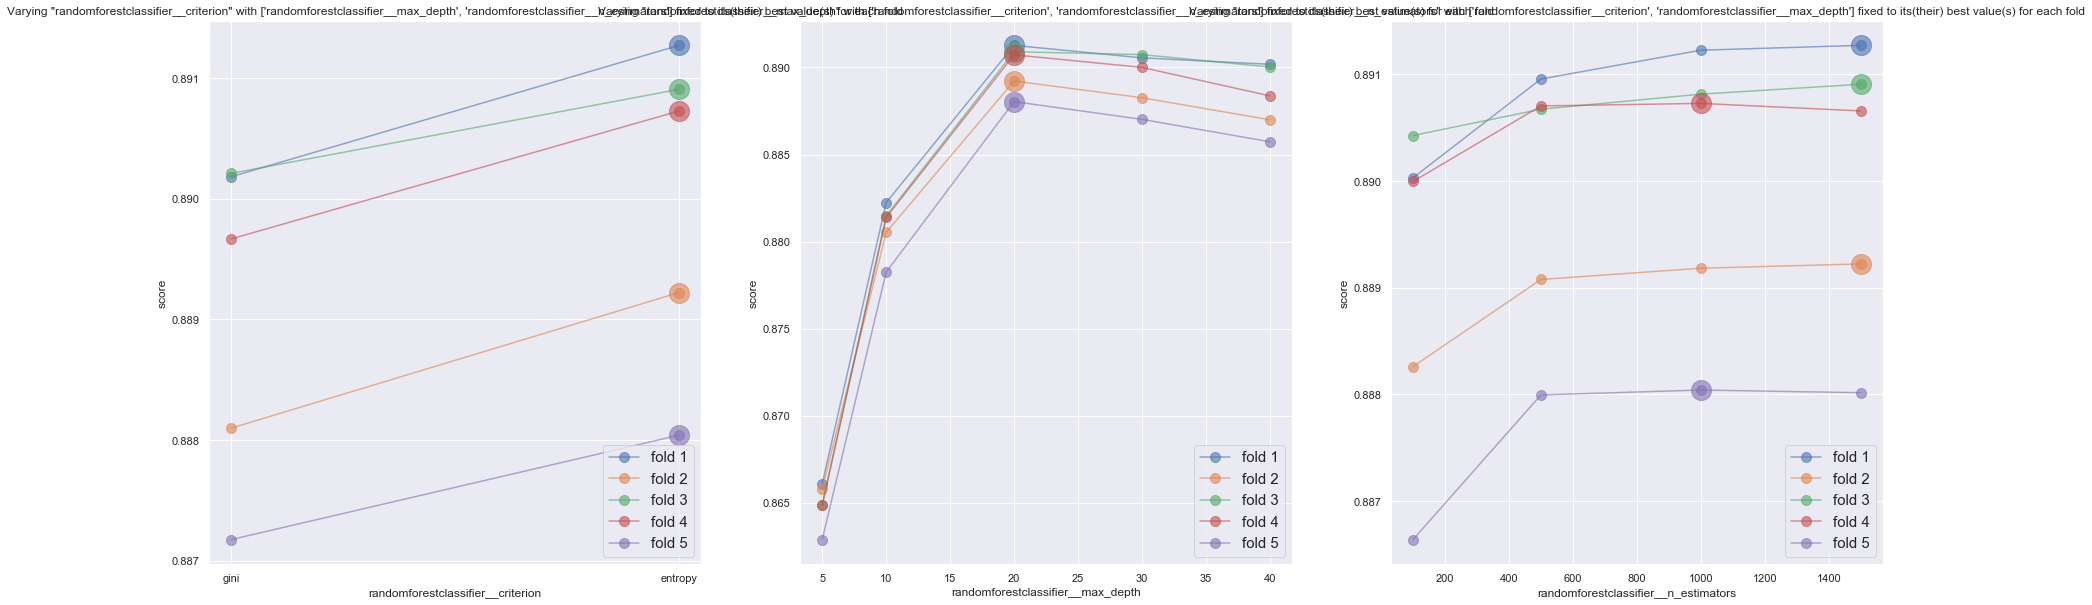

In [50]:
for job in job_list:
    if hasattr(job, 'metrics'):
        print_md('**sampling {}**'.format(i))
        job.metrics.plot_grid_search_results(plot_error_bar=False)
        plt.show()

**sampling 0**  (seed = 0)

Fit model... done! (85.53s)


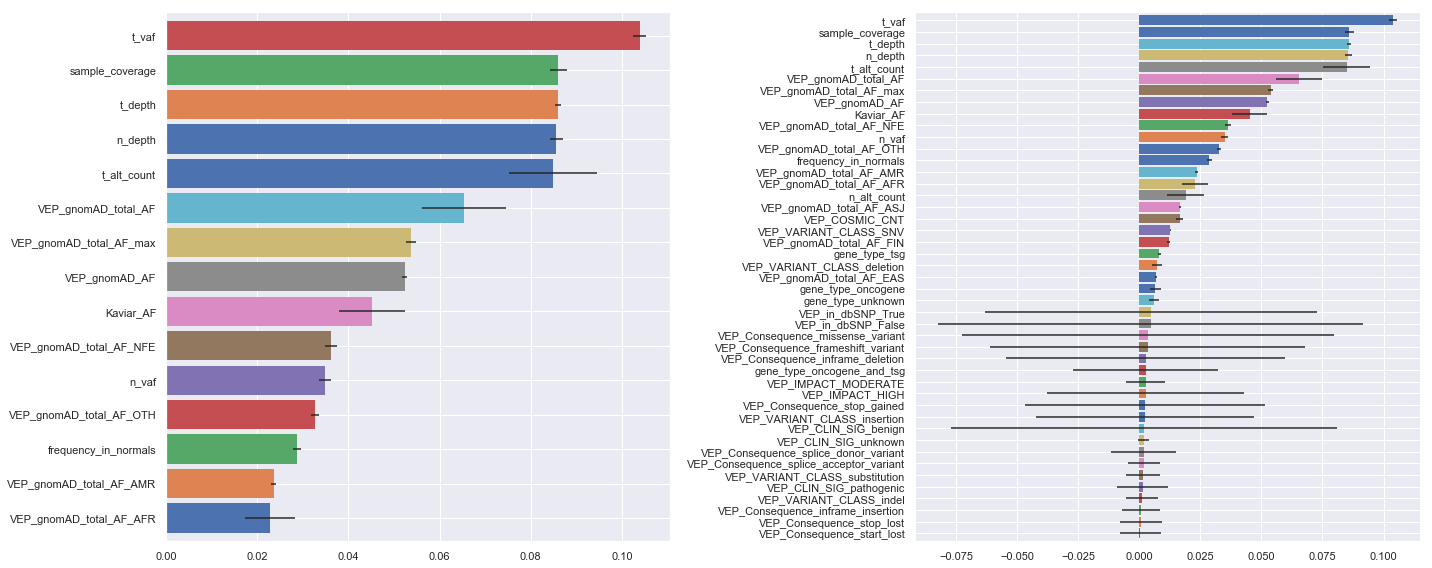

**sampling 1**  (seed = 1)

Fit model... done! (91.48s)


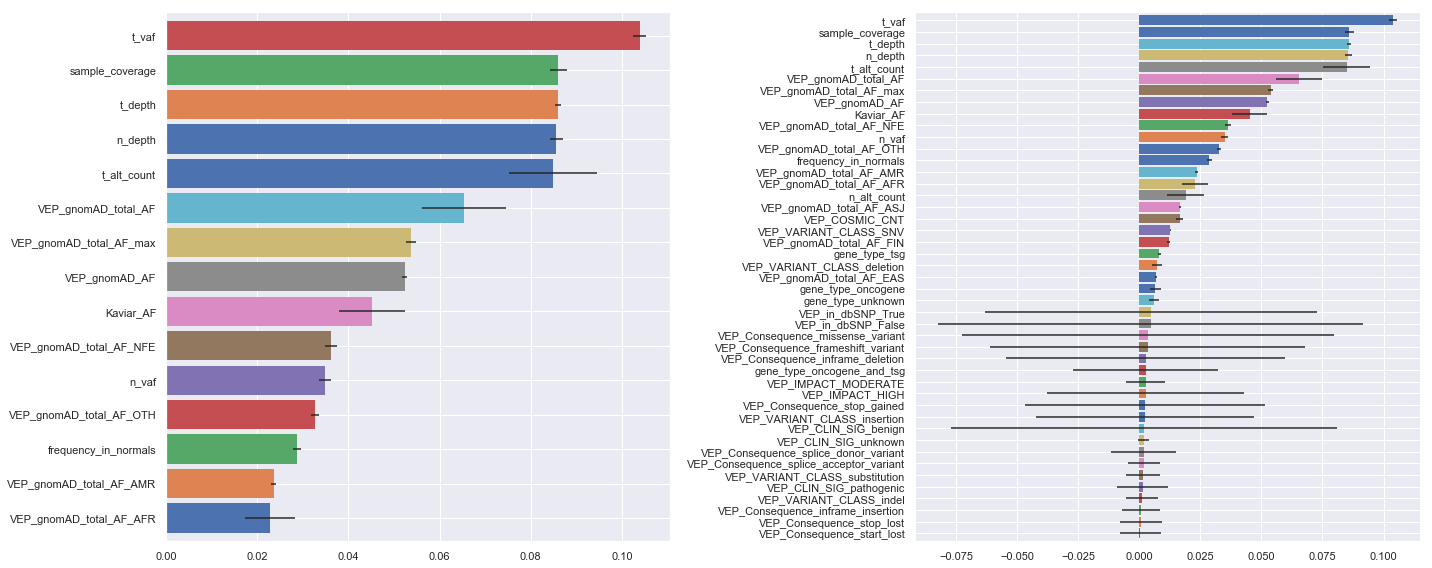

**sampling 2**  (seed = 12)

Fit model... done! (97.20s)


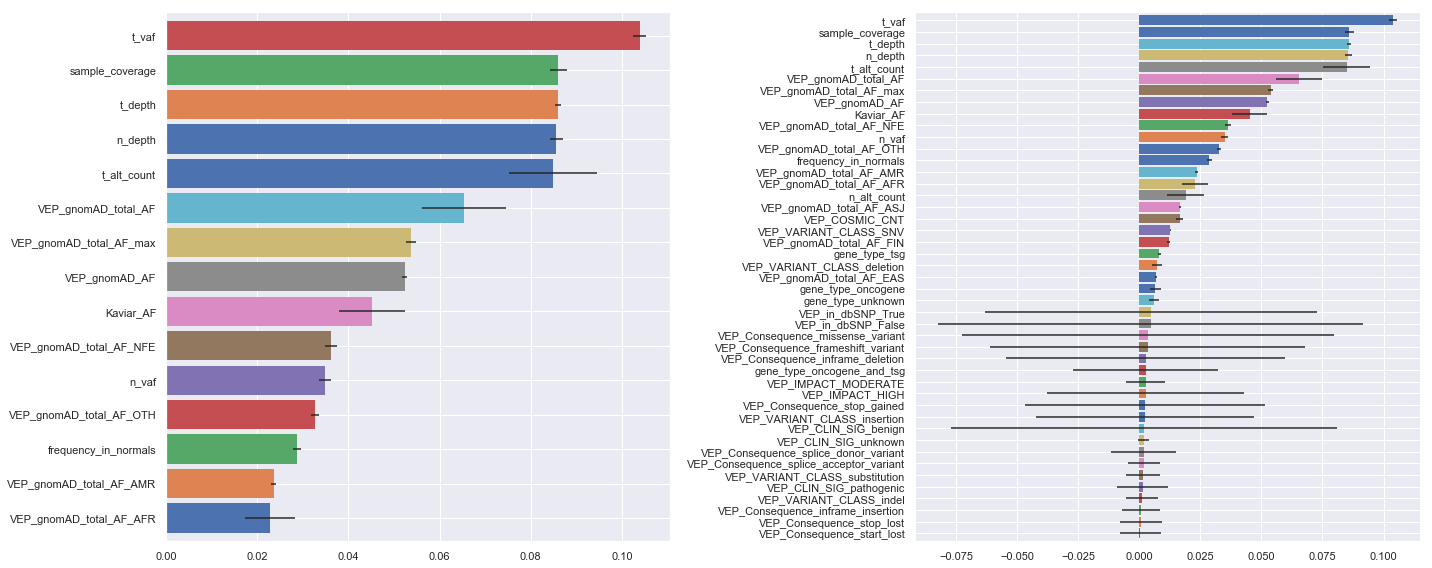

**sampling 3**  (seed = 1672)

Fit model... done! (86.17s)


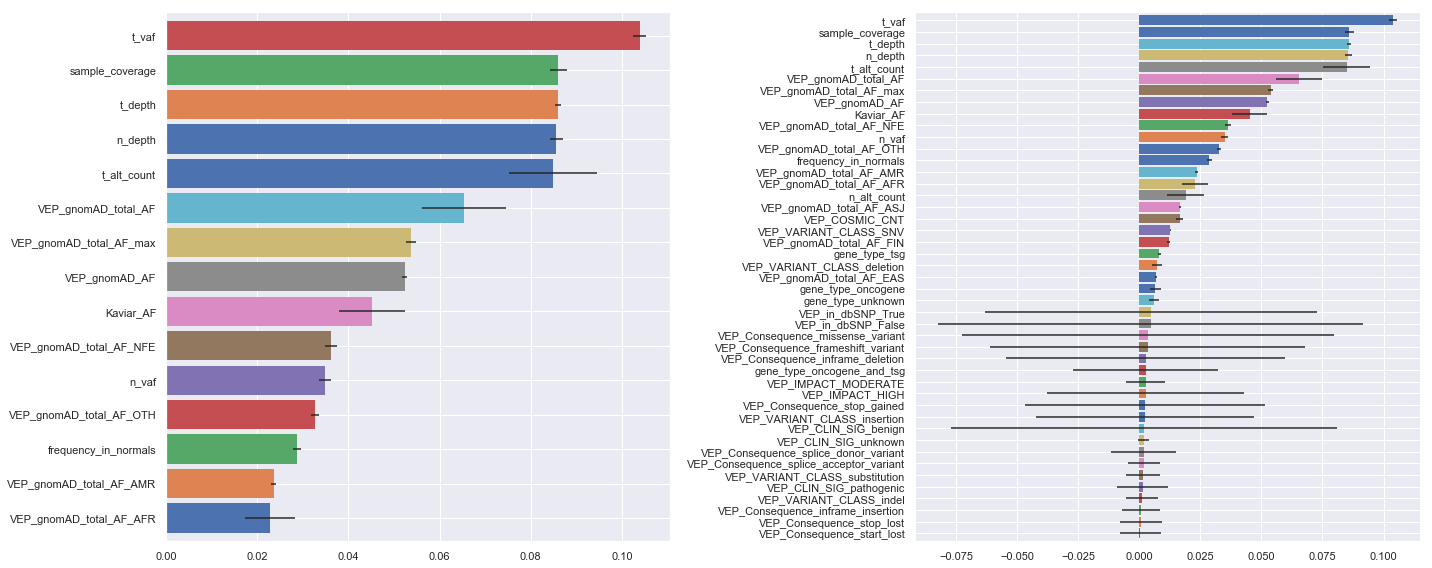

**sampling 4**  (seed = 456782)

Fit model... done! (87.10s)


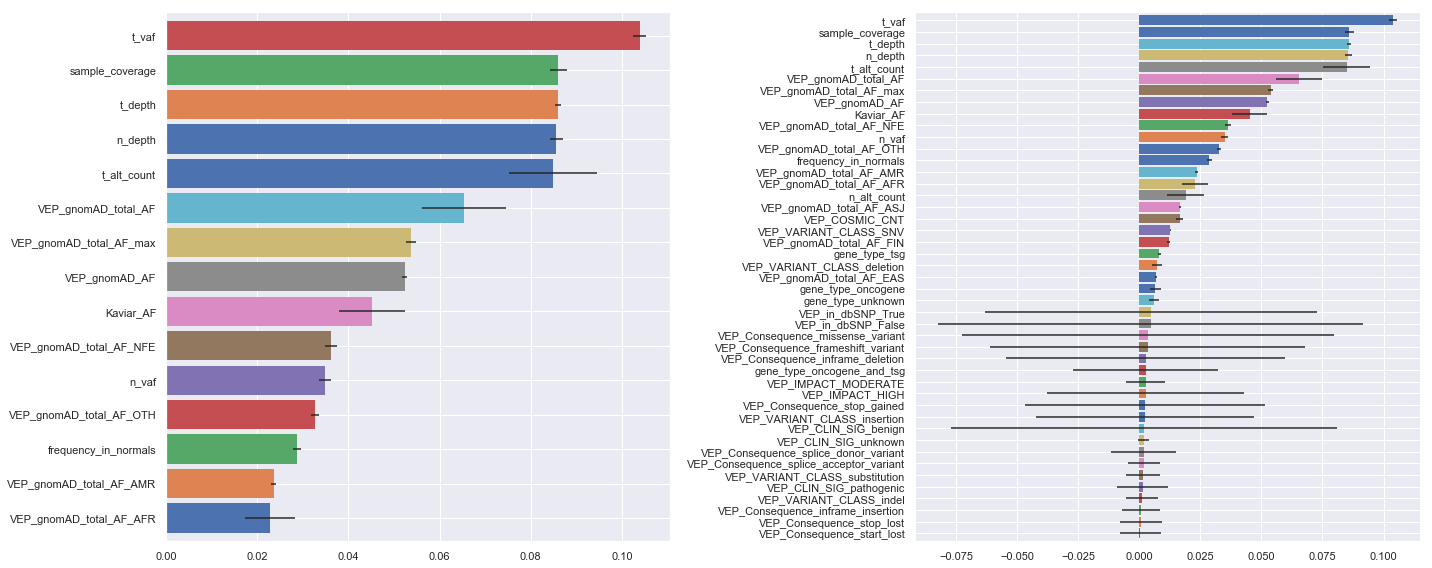

In [46]:
from sklearn.ensemble import RandomForestClassifier

model_bestRF = RandomForestClassifier(random_state=42, n_estimators=1000, max_depth=30, criterion='entropy', n_jobs=5)

for i, seed in enumerate([0, 1, 12, 1672, 456782]):
    print_md('**sampling {}**  (seed = {})'.format(i, seed))
    
    model_bestRF = make_pipeline(RandomUnderSampler(ratio='majority', random_state=seed),
                                 RandomForestClassifier(random_state=42, n_estimators=1000, max_depth=30, criterion='entropy', n_jobs=5))
    
    metrics = Metrics(model_bestRF, X, y, cv_strategy, n_jobs=5, run_model=False)
    metrics.model = metrics.model.steps[1][1]
    metrics.plot_features_importance(random_forest=True)
    plt.show()

In [58]:
for i, color in enumerate(['navy', 'indigo', 'purple', 'darkviolet', 'orchid']):
    summary.add(job_list[i].metrics, 'RandomForest_sampling_{}'.format(i), color)

## Summary

In [61]:
summary = Summary()
summary.load('sampling_summary.pkl')
#summary.save('sampling_summary.pkl')

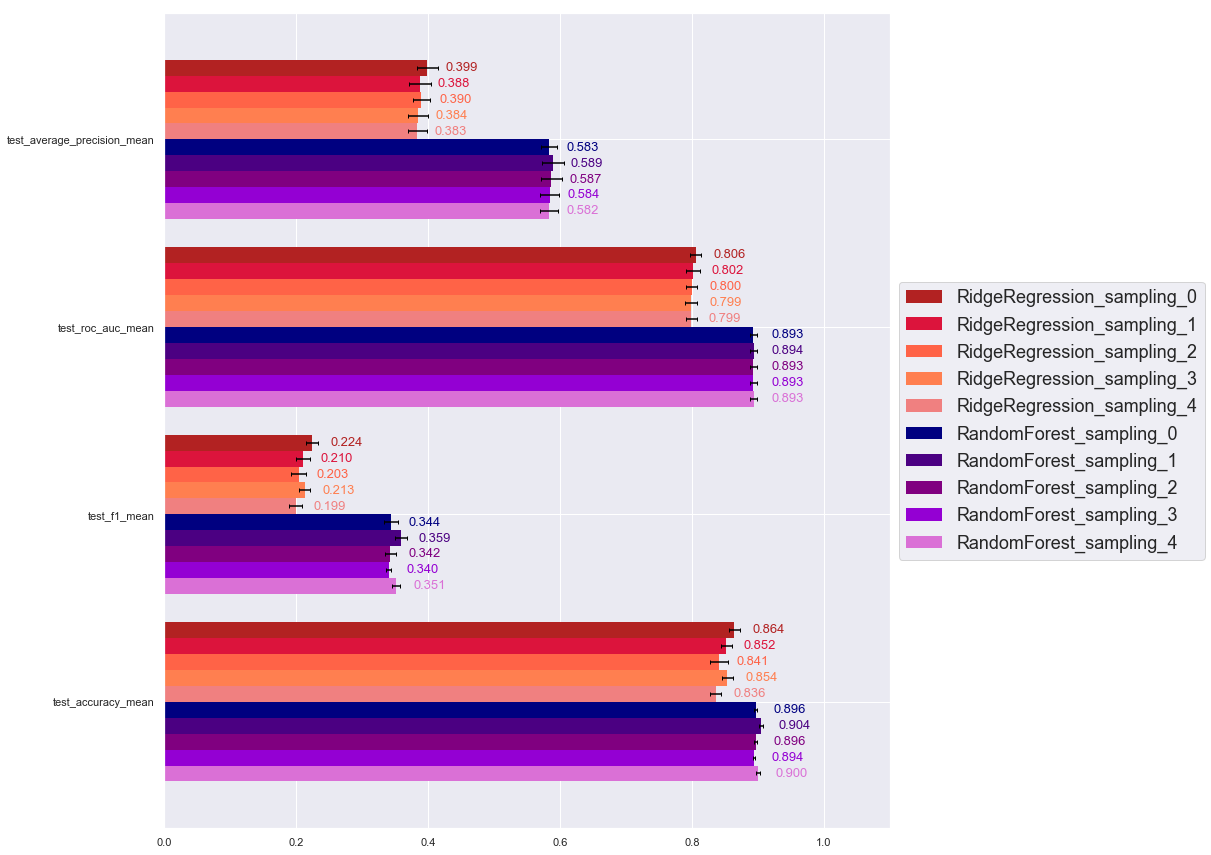

In [62]:
summary.display()
summary.plot(figsize=(13, 15))

# Unified IMPACT

In [91]:
summary = Summary()

## Get the data

In [67]:
data = Impact_Wrapper('../../../data/annotated_final_IMPACT_mutations_180508.txt', 'is_artefact')

In [68]:
def get_random_sample(x, max_number=3):
    if x.shape[0] > max_number:
        return x.sample(max_number, random_state=42).tolist()
    else:
        return x.tolist()

aggregation = {
    'mut_key': 'count',
    'sample_mut_key': [lambda x: x.tolist(),
                       get_random_sample]
}

dd = data.impact.groupby('mut_key').aggregate(aggregation)
dd.head(10)

mut_key  \
                                   count   
mut_key                                    
10_104263912_G_A                       1   
10_104263932_GCGCCCCCGGCCCCACC_-       2   
10_104263935_C_-                       1   
10_104263935_C_T                       1   
10_104263941_G_A                       3   
10_104263952_C_-                       1   
10_104263959_C_T                       1   
10_104263973_-_C                      12   
10_104263974_C_-                       3   
10_104263979_C_A                       1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                    sample_mut_key  \
                                                                                                                                                                                                                                                                                                                                                                                                                                                                          <lambda>   
mut_key                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
10_104263912_G_A                                                                                                                                                                                                                                                                                                                                                                                                                              [P-0004423-T01-IM5_10_104263912_G_A]   
10_104263932_GCGCCCCCGGCCCCACC_-                                                                                                                                                                                                                                                                                                                                          [P-0001027-T01-IM3_10_104263932_GCGCCCCCGGCCCCACC_-, P-0015687-T01-IM6_10_104263932_GCGCCCCCGGCCCCACC_-]   
10_104263935_C_-                                                                                                                                                                                                                                                                                                                                                                                                                              [P-0015938-T01-IM6_10_104263935_C_-]   
10_104263935_C_T                                                                                                                                                                                                                                                                                                                                                                                                                              [P-0012445-T01-IM5_10_104263935_C_T]   
10_104263941_G_A                                                                                                                                                          

In [69]:
selected_sample_mut_key = [x for sublist in dd.sample_mut_key.get_random_sample for x in sublist]

print(data.impact.shape)
data.impact = data.impact[data.impact.sample_mut_key.isin(selected_sample_mut_key)].copy()
print(data.impact.shape)

(194211, 63)
(160752, 63)


In [70]:
features = ['t_depth', 't_vaf', 't_alt_count', 'n_depth', 'n_vaf', 'n_alt_count', 'sample_coverage', 'frequency_in_normals',
            'VEP_Consequence', 'VEP_VARIANT_CLASS', 'VEP_IMPACT', 'VEP_CLIN_SIG', 'VEP_COSMIC_CNT', 'VEP_gnomAD_AF', 'VEP_in_dbSNP',
            'VEP_gnomAD_total_AF_AFR', 'VEP_gnomAD_total_AF_AMR', 'VEP_gnomAD_total_AF_ASJ', 'VEP_gnomAD_total_AF_EAS', 'VEP_gnomAD_total_AF_FIN',
            'VEP_gnomAD_total_AF_NFE', 'VEP_gnomAD_total_AF_OTH', 'VEP_gnomAD_total_AF_max', 'VEP_gnomAD_total_AF', 'Kaviar_AF',
            'gene_type']

data.process(features)

In [71]:
X, y = data.get_X_and_y('all', 'all')
Impact_Wrapper.print_info(X, y)

X: (160752, 45) | y: (160752,)


count_  freq_
False  155564  96.8%
True     5188   3.2%

## Ridge Regression (L2 regularization)

In [72]:
metrics_list = []

In [73]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

for i, seed in enumerate([0, 1, 12, 1672, 456782]):
    print_md('**sampling {}** (seed = {})'.format(i, seed))
    
    model = make_pipeline(RandomUnderSampler(ratio='majority', random_state=seed),
                          StandardScaler(),
                          LogisticRegressionCV(cv=nested_cv_strategy, scoring='roc_auc', random_state=42))
    
    metrics_list.append(Metrics(model, X, y, cv_strategy, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall']))
    # metrics_list[-1].print_mean()

**sampling 0** (seed = 0)

Run model... done! (7.37s)


**sampling 1** (seed = 1)

Run model... done! (6.91s)


**sampling 2** (seed = 12)

Run model... done! (6.83s)


**sampling 3** (seed = 1672)

Run model... done! (6.72s)


**sampling 4** (seed = 456782)

Run model... done! (6.92s)


**sampling 0**

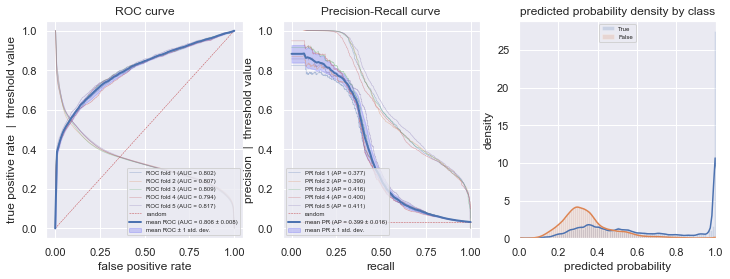

**sampling 1**

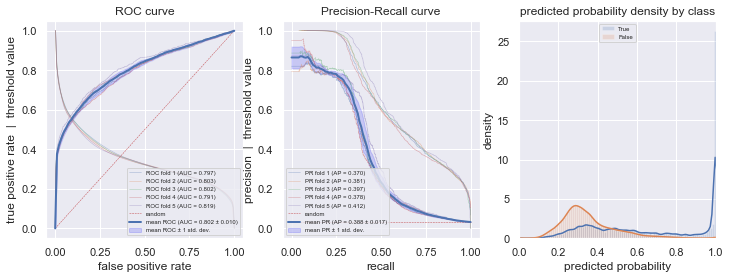

**sampling 2**

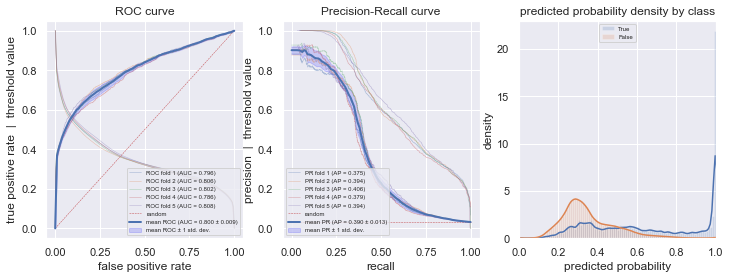

**sampling 3**

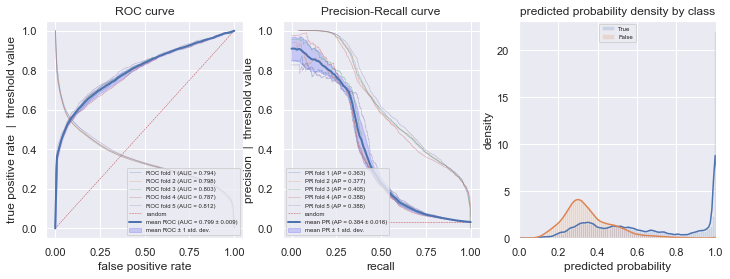

**sampling 4**

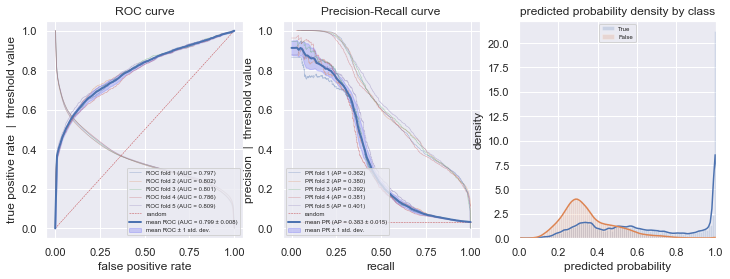

In [74]:
for i, metrics in enumerate(metrics_list):
    print_md('**sampling {}**'.format(i))
    metrics.plot_threshold_decision_curves(figsize=(12, 4))
    plt.show()

**sampling 0**

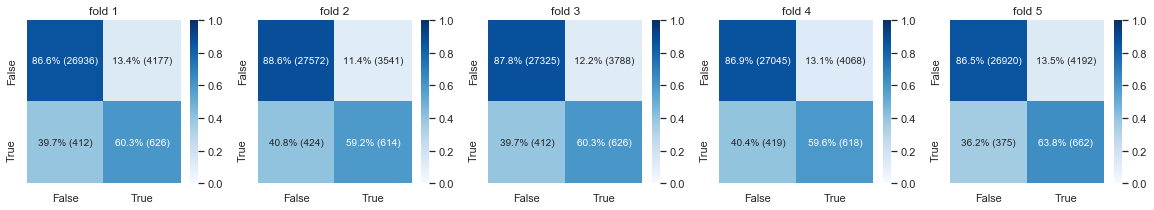

**sampling 1**

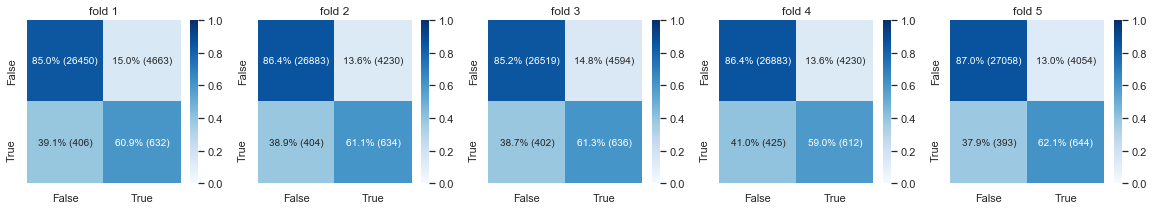

**sampling 2**

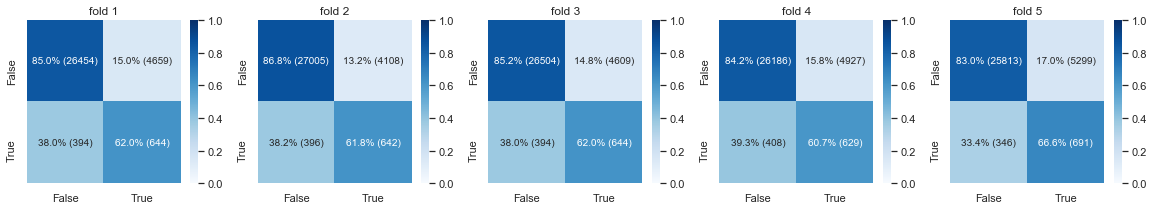

**sampling 3**

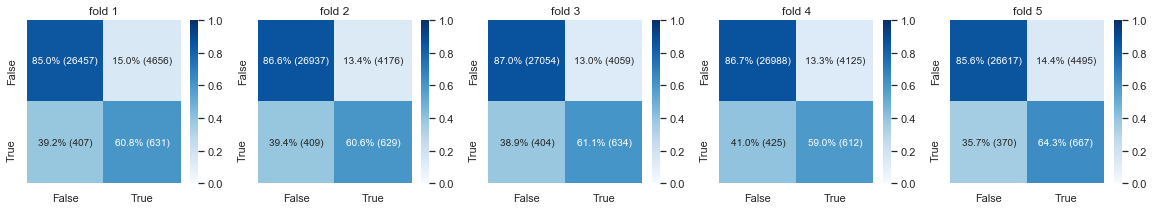

**sampling 4**

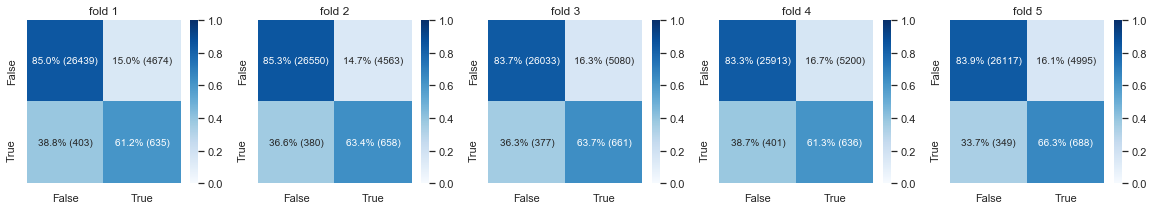

In [75]:
for i, metrics in enumerate(metrics_list):
    print_md('**sampling {}**'.format(i))
    metrics.plot_confusion_matrix()
    plt.show()

In [92]:
for i, color in enumerate(['firebrick', 'crimson', 'tomato', 'coral', 'lightcoral']):
    summary.add(metrics_list[i], 'RidgeRegression_unified_sampling_{}'.format(i), color)

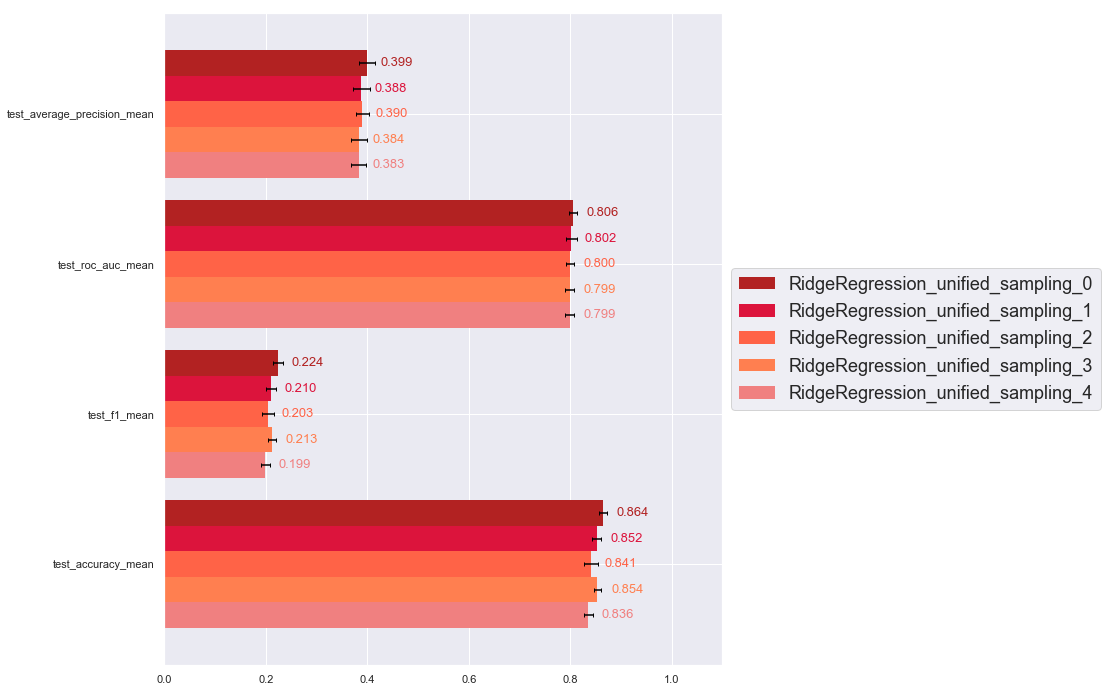

In [94]:
summary.display()
summary.plot()

## Random Forest

In [63]:
job_list = []
for i in range(5):
    job_list.append(Selene_Job('RandomForest_unified_sampling_{}'.format(i), 'guilminp', '/home/guilminp/impact-annotator', '../ssh_remote_jobs'))

➞ mkdir on local computer ../ssh_remote_jobs/job_RandomForest_unified_sampling_0


<span style="color:green">Job < RandomForest_unified_sampling_0 >: </span>✅ created

<span style="color:red">Job < RandomForest_unified_sampling_1 >: </span>⚠️ job already exists, please remove it with `job.remove()` or use `load_from_id = True` to reload the existing job<br>

<span style="color:red">Job < RandomForest_unified_sampling_2 >: </span>⚠️ job already exists, please remove it with `job.remove()` or use `load_from_id = True` to reload the existing job<br>

<span style="color:red">Job < RandomForest_unified_sampling_3 >: </span>⚠️ job already exists, please remove it with `job.remove()` or use `load_from_id = True` to reload the existing job<br>

➞ mkdir on local computer ../ssh_remote_jobs/job_RandomForest_unified_sampling_4


<span style="color:green">Job < RandomForest_unified_sampling_4 >: </span>✅ created

In [95]:
job_list = []
for i in range(5):
    job_list.append(Selene_Job('RandomForest_unified_sampling_{}'.format(i), 'guilminp', '/home/guilminp/impact-annotator', '../ssh_remote_jobs', load_from_id=True))

<span style="color:green">Job < RandomForest_unified_sampling_0 >: </span>✅ job found and reloaded

<span style="color:green">Job < RandomForest_unified_sampling_1 >: </span>✅ job found and reloaded

<span style="color:green">Job < RandomForest_unified_sampling_2 >: </span>✅ job found and reloaded

<span style="color:green">Job < RandomForest_unified_sampling_3 >: </span>✅ job found and reloaded

<span style="color:green">Job < RandomForest_unified_sampling_4 >: </span>✅ job found and reloaded

In [79]:
for job in job_list:
    job.load_data(X, y)

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_unified_sampling_0


<span style="color:green">Job < RandomForest_unified_sampling_0 >: </span>✅ data loaded

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_unified_sampling_1


<span style="color:green">Job < RandomForest_unified_sampling_1 >: </span>✅ data loaded

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_unified_sampling_2


<span style="color:green">Job < RandomForest_unified_sampling_2 >: </span>✅ data loaded

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_unified_sampling_3


<span style="color:green">Job < RandomForest_unified_sampling_3 >: </span>✅ data loaded

➞ save X.pkl & y.pkl in ../ssh_remote_jobs/job_RandomForest_unified_sampling_4


<span style="color:green">Job < RandomForest_unified_sampling_4 >: </span>✅ data loaded

[0, 1, 12, 1672, 456782]

In [85]:
%%writefile {job_list[4].script_path}

# load the ml_tools functions
%run ../../metrics.py

# load the features matrix and target array
X = pd.read_pickle('X.pkl')
y = pd.read_pickle('y.pkl')

# setup cross-validation and import modules
from sklearn.model_selection import StratifiedKFold
cv_strategy = StratifiedKFold(n_splits=5)
nested_cv_strategy = StratifiedKFold(n_splits=3)

# setup imblearn
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import RandomUnderSampler

# choose a model and run it
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
parameters_grid = [
    {'randomforestclassifier__n_estimators': [100, 500, 1000, 1500], 'randomforestclassifier__criterion': ['gini', 'entropy'], 'randomforestclassifier__max_depth': [5, 10, 20, 30, 40]}
]

pipe = make_pipeline(RandomUnderSampler(ratio='majority', random_state=456782),
                     RandomForestClassifier(random_state=42))

model = GridSearchCV(pipe, parameters_grid, cv=nested_cv_strategy, scoring='roc_auc', refit=True, return_train_score=True)
metrics = Metrics(model, X, y, cv_strategy, n_jobs=5, scoring=['accuracy', 'f1', 'roc_auc', 'average_precision', 'recall'])

# save the metrics
print('Save metrics...', end='')
metrics.save()
print(' done!')

Writing ../ssh_remote_jobs/job_RandomForest_unified_sampling_4/script.ipy


In [86]:
for job in job_list:
    job.run(n_jobs=10, short_job=True, memory=16)

➞ scp ../ssh_remote_jobs/job_RandomForest_unified_sampling_0 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
script.ipy                                    100% 1265    62.6KB/s   00:00    
X.pkl                                         100%   36MB  11.8MB/s   00:03    
y.pkl                                         100%  158KB   3.6MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_0
Job <28864244> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_unified_sampling_0 -We 59 -n 10 -R "span[ptile=5,mem=16]" "ipython script.ipy"


<span style="color:green">Job < RandomForest_unified_sampling_0 >: </span>✅ submitted<br>

➞ scp ../ssh_remote_jobs/job_RandomForest_unified_sampling_1 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1554     1.6KB/s   00:00    
metrics.pkl                                   100%  379KB   3.6MB/s   00:00    
script.ipy                                    100% 1265    19.2KB/s   00:00    
X.pkl                                         100%   36MB  11.8MB/s   00:03    
y.pkl                                         100%  158KB   1.5MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_1
Job <28864260> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_unified_sampling_1 -We 59 -n 10 -R "span[ptile=5,mem=1

<span style="color:green">Job < RandomForest_unified_sampling_1 >: </span>✅ submitted<br>

➞ scp ../ssh_remote_jobs/job_RandomForest_unified_sampling_2 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1555    29.2KB/s   00:00    
metrics.pkl                                   100%  389KB   2.3MB/s   00:00    
script.ipy                                    100% 1266    33.8KB/s   00:00    
X.pkl                                         100%   36MB  11.8MB/s   00:03    
y.pkl                                         100%  158KB   3.3MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_2
Job <28864296> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_unified_sampling_2 -We 59 -n 10 -R "span[ptile=5,mem=1

<span style="color:green">Job < RandomForest_unified_sampling_2 >: </span>✅ submitted<br>

➞ scp ../ssh_remote_jobs/job_RandomForest_unified_sampling_3 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
job_output.txt                                100% 1554    10.9KB/s   00:00    
metrics.pkl                                   100%  390KB   2.8MB/s   00:00    
script.ipy                                    100% 1268    33.0KB/s   00:00    
X.pkl                                         100%   36MB  11.8MB/s   00:03    
y.pkl                                         100%  158KB   1.5MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_3
Job <28864313> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_unified_sampling_3 -We 59 -n 10 -R "span[ptile=5,mem=1

<span style="color:green">Job < RandomForest_unified_sampling_3 >: </span>✅ submitted<br>

➞ scp ../ssh_remote_jobs/job_RandomForest_unified_sampling_4 to guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs
script.ipy                                    100% 1270     2.3KB/s   00:00    
X.pkl                                         100%   36MB  13.6MB/s   00:02    
y.pkl                                         100%  158KB   7.9MB/s   00:00    
➞ logged in /home/guilminp on selene.cbio.private
➞ load ~/.bash_profile
Hi Pierre!
➞ work on impact-annotator_env python virtualenv
➞ rm metrics.pkl & job_output.txt in /home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_4
Job <28864327> is submitted to default queue <sol>.
➞ bsub command used: $ bsub -o job_output.txt -J RandomForest_unified_sampling_4 -We 59 -n 10 -R "span[ptile=5,mem=16]" "ipython script.ipy"


<span style="color:green">Job < RandomForest_unified_sampling_4 >: </span>✅ submitted<br>

In [96]:
for job in job_list:
    job.get_results()

<span style="color:green">Job < RandomForest_unified_sampling_0 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_0 to ../ssh_remote_jobs/job_RandomForest_unified_sampling_0
metrics.pkl                                   100% 5474KB   3.4MB/s   00:01    
job_output.txt                                100% 1558    51.9KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.858 ± 0.005
▴ Mean f1               : 0.237 ± 0.005
▴ Mean roc_auc          : 0.852 ± 0.008
▴ Mean average_precision: 0.478 ± 0.025


<span style="color:green">Job < RandomForest_unified_sampling_1 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_1 to ../ssh_remote_jobs/job_RandomForest_unified_sampling_1
metrics.pkl                                   100% 5425KB   4.4MB/s   00:01    
job_output.txt                                100% 1558     4.1KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.852 ± 0.003
▴ Mean f1               : 0.234 ± 0.005
▴ Mean roc_auc          : 0.852 ± 0.009
▴ Mean average_precision: 0.468 ± 0.019


<span style="color:green">Job < RandomForest_unified_sampling_2 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_2 to ../ssh_remote_jobs/job_RandomForest_unified_sampling_2
metrics.pkl                                   100% 5477KB   2.9MB/s   00:01    
job_output.txt                                100% 1558    14.5KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.856 ± 0.002
▴ Mean f1               : 0.237 ± 0.005
▴ Mean roc_auc          : 0.852 ± 0.008
▴ Mean average_precision: 0.479 ± 0.019


<span style="color:green">Job < RandomForest_unified_sampling_3 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_3 to ../ssh_remote_jobs/job_RandomForest_unified_sampling_3
metrics.pkl                                   100% 5446KB   3.6MB/s   00:01    
job_output.txt                                100% 1558    70.7KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.862 ± 0.003
▴ Mean f1               : 0.242 ± 0.005
▴ Mean roc_auc          : 0.852 ± 0.009
▴ Mean average_precision: 0.482 ± 0.016


<span style="color:green">Job < RandomForest_unified_sampling_4 >: </span>✅ finished<br>

➞ scp metrics.pkl & job_output.txt from guilminp@selene.mskcc.org:/home/guilminp/impact-annotator/analysis/prediction/ssh_remote_jobs/job_RandomForest_unified_sampling_4 to ../ssh_remote_jobs/job_RandomForest_unified_sampling_4
metrics.pkl                                   100% 5456KB   3.7MB/s   00:01    
job_output.txt                                100% 1558     8.9KB/s   00:00    
➞ load metrics.pkl in object self.metrics
➞ print main results
▴ Mean accuracy         : 0.855 ± 0.005
▴ Mean f1               : 0.235 ± 0.009
▴ Mean roc_auc          : 0.851 ± 0.008
▴ Mean average_precision: 0.476 ± 0.018


**sampling 0**

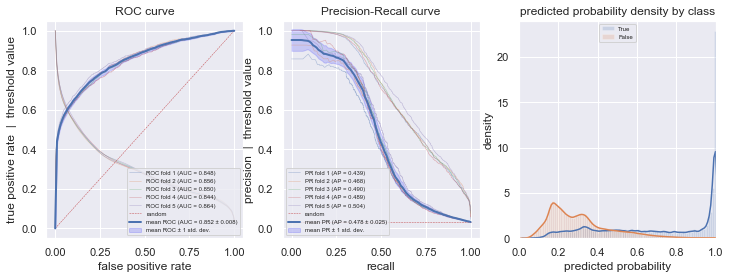

**sampling 1**

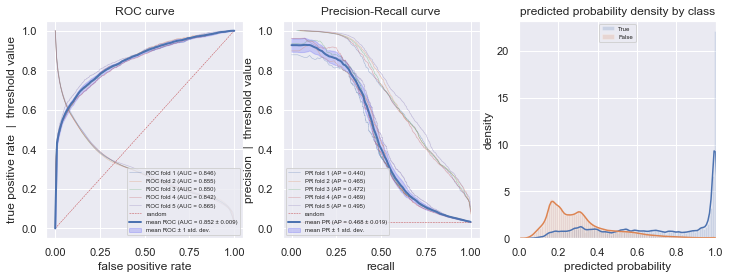

**sampling 2**

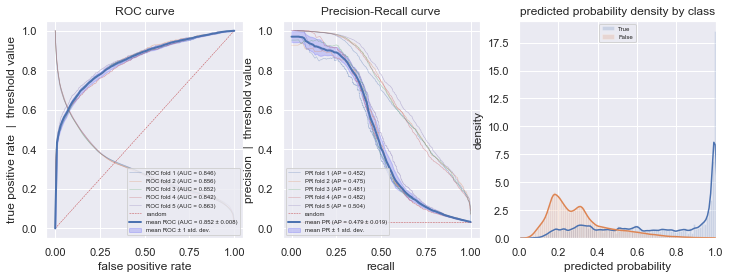

**sampling 3**

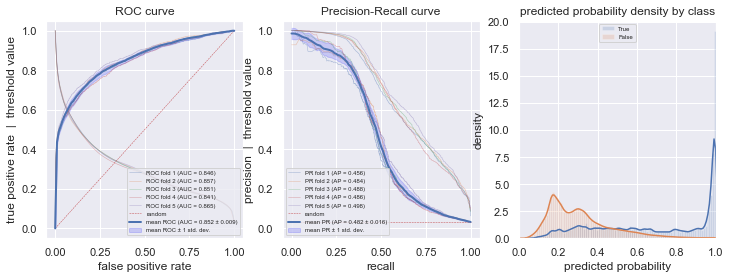

**sampling 4**

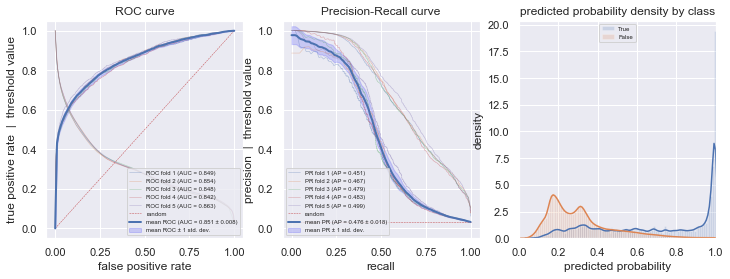

In [99]:
for (i, job) in enumerate(job_list):
    if hasattr(job, 'metrics'):
        print_md('**sampling {}**'.format(i))
        job.metrics.plot_threshold_decision_curves(figsize=(12, 4))
        plt.show()

**sampling 0**

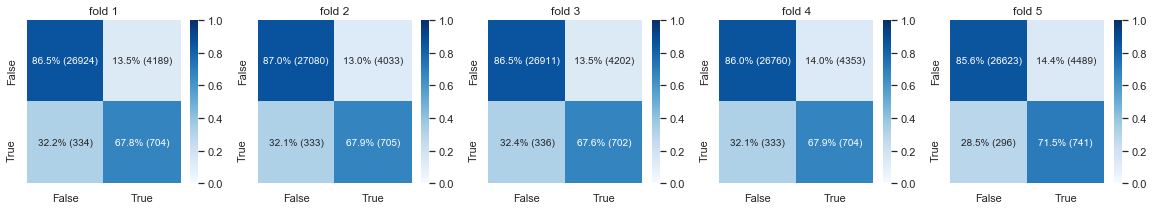

**sampling 1**

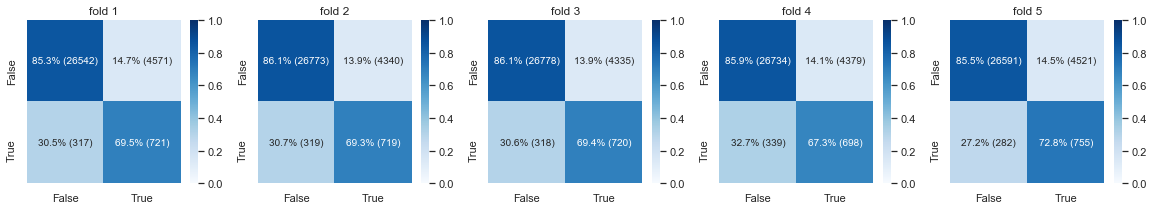

**sampling 2**

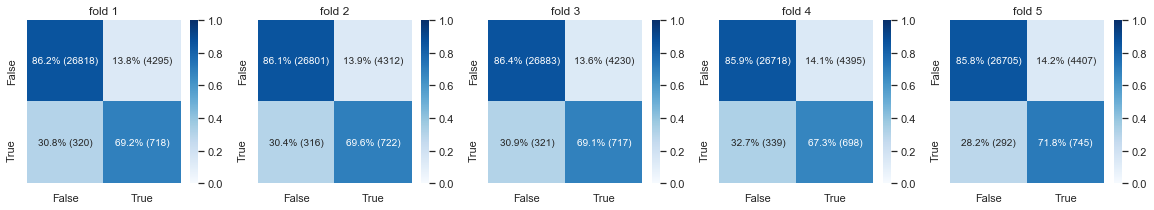

**sampling 3**

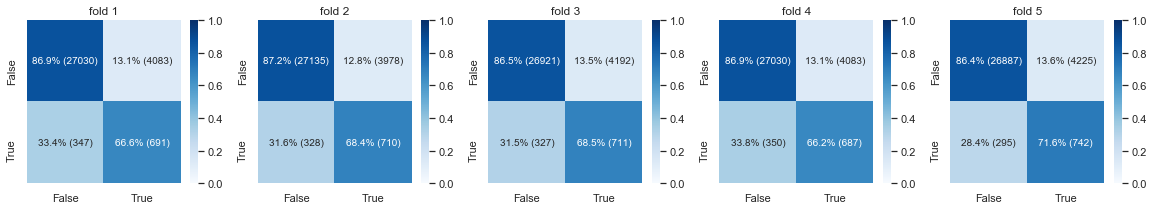

**sampling 4**

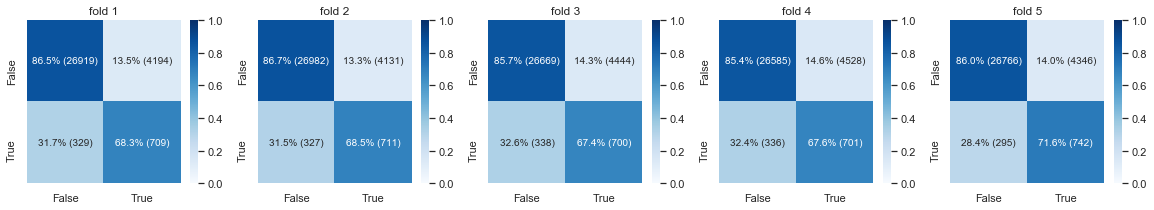

In [100]:
for (i, job) in enumerate(job_list):
    if hasattr(job, 'metrics'):
        print_md('**sampling {}**'.format(i))
        job.metrics.plot_confusion_matrix()
        plt.show()

In [90]:
for (i, job) in enumerate(job_list):
    if hasattr(job, 'metrics'):
        print_md('**sampling {}**'.format(i))
        job.metrics.plot_grid_search_results(plot_error_bar=False)
        plt.show()

In [101]:
for i, color in enumerate(['navy', 'indigo', 'purple', 'darkviolet', 'orchid']):
    summary.add(job_list[i].metrics, 'RandomForest_unified_sampling_{}'.format(i), color)

## Summary

In [103]:
summary = Summary()
summary.load('sampling_unified_summary.pkl')
#summary.save('sampling_unified_summary.pkl')

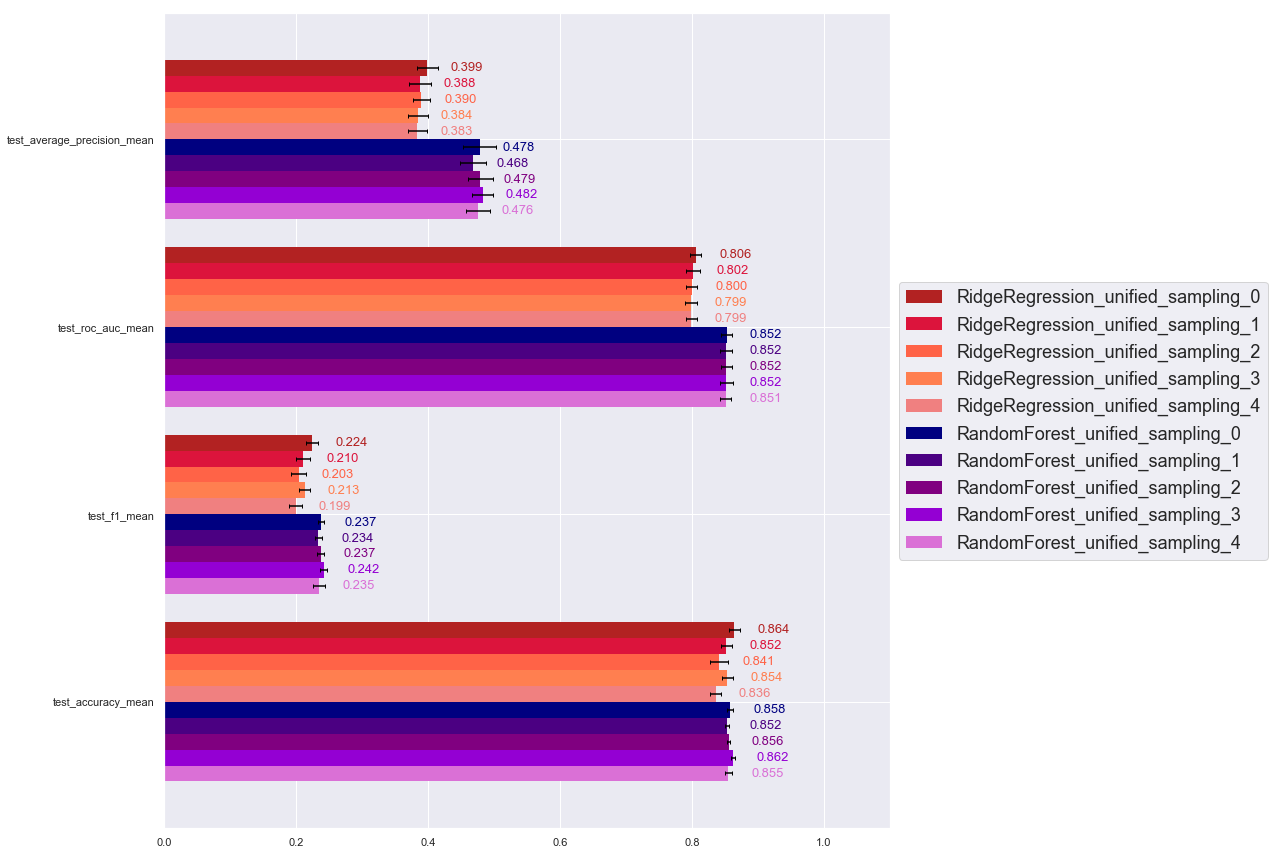

In [102]:
summary.display()
summary.plot(figsize=(13, 15))